In [1]:
from proteus.iproteus import * #pull in what we need for using proteus interactively
Profiling.logLevel=2
Profiling.verbose = True
load_macros("macros.tex")

$\newcommand{\C}{\mathbb{C}}$
$\newcommand{\Du}{\underline{D}}$
$\newcommand{\veps}{\varepsilon}$
$\newcommand{\eps}{\epsilon}$
$\newcommand{\f}{\textbf{f}}$
$\newcommand{\fb}{\textbf{f}}$
$\newcommand{\F}{\mathbb{F}}$
$\newcommand{\Fb}{\textbf{F}}$
$\newcommand{\gb}{\textbf{g}}$
$\newcommand{\h}{\textbf{h}}$
$\newcommand{\kb}{\textbf{k}}$
$\newcommand{\M}{\mathcal{M}}$
$\newcommand{\N}{\mathbb{N}}$
$\newcommand{\Norm}{\textbf{N}}$
$\newcommand{\n}{\textbf{n}}$
$\newcommand{\vp}{\varphi}$
$\newcommand{\vph}{\hat{\varphi}}$
$\newcommand{\p}{\phi}$
$\newcommand{\Proj}{\mathbb{P}}$
$\newcommand{\Pcal}{\mathcal{P}}$
$\newcommand{\Q}{\mathbb{Q}}$
$\newcommand{\R}{\mathbb{R}}$
$\newcommand{\rb}{\textbf{r}}$
$\newcommand{\s}[1]{\mathcal{#1}}$
$\newcommand{\supp}{\text{supp}}$
$\newcommand{\Surf}{\textbf{S}}$
$\newcommand{\tpsi}{\tilde{\psi}}$
$\newcommand{\ub}{\textbf{u}}$
$\newcommand{\U}{\textbf{U}}$
$\newcommand{\vb}{\textbf{v}}$
$\newcommand{\V}{\mathbb{V}}$
$\newcommand{\wb}{\textbf{w}}$
$\newcommand{\x}{\textbf{x}}$
$\newcommand{\xh}{\hat{x}}$
$\newcommand{\X}{\textbf{X}}$
$\newcommand{\y}{\textbf{y}}$
$\newcommand{\yh}{\hat{y}}$
$\newcommand{\Y}{\textbf{Y}}$
$\newcommand{\Z}{\mathbb{Z}}$
$\DeclareMathOperator{\sech}{sech}$
$\DeclareMathOperator{\atanh}{atanh}$
$\DeclareMathOperator{\sign}{sign}$
$\DeclareMathOperator{\tr}{Trace}$
$\DeclareMathOperator{\gradsymm}{\nabla_{s}}$
$\DeclareMathOperator{\divergence}{div}$
$\DeclareMathOperator{\diag}{diag}$
$\DeclareMathOperator*{\argmin}{argmin}$
$\DeclareMathOperator*{\argmax}{argmax}$
$\DeclareMathOperator{\Span}{Span}$
$\DeclareMathOperator{\rank}{rank}$
$\newcommand{\br}[1]{\left\langle #1 \right\rangle}$
$\newcommand{\paren}[1]{\left(#1\right)}$
$\newcommand{\sq}[1]{\left[#1\right]}$
$\newcommand{\set}[1]{\left\{\: #1 \:\right\}}$
$\newcommand{\setp}[2]{\left\{\, #1\: \middle|\: #2 \, \right\}}$
$\newcommand{\abs}[1]{\left| #1 \right|}$
$\newcommand{\norm}[1]{\left\| #1 \right\|}$
$\newcommand{\system}[1]{\left\{ \begin{array}{rl} #1 \end{array} \right.}$
$\newcommand{\pf}[2]{\frac{\partial #1}{\partial #2}}$
$\newcommand{\ipt}[2]{\langle #1,#2 \rangle}$
$\newcommand{\ip}{\int_{-\infty}^{+\infty}}$
$\renewcommand{\ker}[1]{\mathcal{N}(#1)}$
$\newcommand{\ran}[1]{\mathcal{R}(#1)}$


## Problem Description

Solve the 2D Navier-Stokes equation on a square domain.  That is, find density $\rho>0$, velocity field $\mathbf{v}:\Omega \rightarrow \mathbb{R} \times \mathbb{R}^2$ and pressure $p:\Omega\rightarrow\R$ such that

$$
\begin{equation}
\begin{cases}
\rho_t + \nabla\cdot(\rho\vb) = 0,&\\
\rho\left(\frac{\partial \vb}{\partial t} + \vb\cdot\nabla\vb\right) +  \nabla p  - \nabla \cdot \left(\mu \nabla\vb\right) = \fb(x,t),&\\
\nabla \cdot \vb  = 0,&
\end{cases}
\end{equation}
$$

on domain $\Omega = [0,1]^2$ and time interval $[0,T].$ Here $\mathbf{f}(x,t)$ is a smooth external force and the dynamic viscosity, $\mu>0$, is constant. 

Let $\partial\Omega^{in} = \{\x\in\partial\Omega \:|\: \vb\cdot \n < 0 \}$ be the inflow boundary.  We supplement the above system with initial conditions for density and velocity and inflow boundary conditions for density and dirichlet boundary conditions for velocity.

$$
\begin{equation}
  \begin{cases}
    \rho(\x,0) = \rho_0(\x),&\\
    \vb(\x,0) = \vb_0(\x),&
  \end{cases}
\end{equation}
$$
and
$$
\begin{equation}
  \begin{cases}
    \left.\rho(\x,t)\right|_{\partial\Omega^{in}} = \rho^{in}(\x,t),&\\
    \left.\vb(\x,t)\right|_{\partial\Omega} = b(\x,t),&
  \end{cases}
\end{equation}
$$

If $b(\x,t)=0$ then our boundary is impermeable and $\partial\Omega^{in} = \emptyset$.  However if we do allow for non zero boundary conditions for velocity, then our inflow set could be non empty.

We can add inflow boundary conditions for the pressure term as well until we do our splitting in which case pressure will be fixed by our intermediate steps.
 

###Define the PDE by defining the coefficients

In [2]:
import imp

import NavierStokes
# from NavierStokes import NavierStokes2D
imp.reload(NavierStokes)

display_src(NavierStokes.NavierStokes2D)

```Python
class NavierStokes2D(TransportCoefficients.TC_base):
    r"""
    The coefficients of the 2D Navier Stokes momentum equation with variable density.  This coefficient class
    will only represent the momentum equation and the incompressibility equation but not the conservation of mass.
    
    For completeness we give them all and note that this class only represents the 2nd and 3rd equation.
    .. math::
       :nowrap:
       
       \begin{equation}
       \begin{cases}
       \rho_t + \nabla\cdot(\rho\vb) = 0,&\\
       \rho\left(\frac{\partial \vb}{\partial t} + \vb\cdot\nabla\vb\right) +  \nabla p  - \nabla \cdot \left(\mu \nabla\vb\right) = \fb(x,t),&\\
       \nabla \cdot \vb  = 0,&
       \end{cases}
       \end{equation}
       
    where :math:`\rho>0` is the density, :math:`\mathbf{v}` is the velocity field,  :math:`p` is the pressure and :math:`\mu` is the dynamic
    viscosity which could depend on density :math:`\rho`.
    
    We solve this equation on a 2D disk :math:`\Omega=\{(x,y) \:|\: x^2+y^2<1\}` 
    
    """
    def __init__(self,rhoofx,f1ofx,f2ofx,mu=1.0):
        
        sdInfo  = {(0,0):(np.array([0,1,2],dtype='i'),  # sparse diffusion uses diagonal element for diffusion coefficient
                          np.array([0,1],dtype='i')),
                   (1,1):(np.array([0,1,2],dtype='i'),
                          np.array([0,1],dtype='i'))}
        dim=2; # dimension of space
        xi=0; yi=1; # indices for first component or second component of dimension
        eu=0; ev=1; ediv=2; # equation numbers  momentum u, momentum v, divergencefree
        ui=0; vi=1; pi=2;  # variable name ordering
        
        TransportCoefficients.TC_base.__init__(self, 
                         nc=dim+1, #number of components  u, v, p
                         variableNames=['u','v','p'], # defines variable reference order [0, 1, 2]
                         mass = {eu:{ui:'linear'}, # du/dt
                                 ev:{vi:'linear'}}, # dv/dt
                         advection = {ediv:{ui:'linear',   # \nabla\cdot [u v]
                                            vi:'linear'}}, # \nabla\cdot [u v]
                         hamiltonian = {eu:{ui:'nonlinear', # u u_x + v u_y    convection term   
                                            pi:'linear'},   # p_x
                                        ev:{vi:'nonlinear', # u v_x + v v_y   convection term
                                            pi:'linear'}},  # p_y
                         diffusion = {eu:{ui:{ui:'constant'}},  # - \mu * \grad u
                                      ev:{vi:{vi:'constant'}}}, # - \mu * \grad v
                         potential = {eu:{ui:'u'},
                                      ev:{vi:'u'}}, # define the potential for the diffusion term to be the solution itself
                         reaction  = {eu:{ui:'constant'}, # f1(x)
                                      ev:{vi:'constant'}}, # f2(x)
                         sparseDiffusionTensors=sdInfo,
                         useSparseDiffusion=True),
                        
                
        self.rhoofx=rhoofx
        self.f1ofx=f1ofx
        self.f2ofx=f2ofx
        self.mu=mu
        
    def evaluate(self,t,c):
        """
        evaluate quadrature point values held in the dictionary c
        These are labelled according to the 'master equation.' For example,
         
        c[('a',0,0)] = diffusion coefficient for the 0th equation (first) with respect to the
                       0th potential (the solution itself)
                       The value at each quadrature point is a n_d x n_d tensor (n_d=number of space dimensions).
                       Usually the tensor values are stored as a flat array in compressed sparse row format to save space. 
                       By default, we assume the tensor is full though.
                       
        c[('r',0)]   = reaction term for the 0th equation. This is where we will put the source term
        """
        xi=0; yi=1; # indices for first component or second component of dimension
        eu=0; ev=1; ediv=2; # equation numbers  momentum u, momentum v, divergencefree
        ui=0; vi=1; pi=2;  # variable name ordering
        u = c[('u',ui)]
        v = c[('u',vi)]
        p = c[('u',pi)]
        grad_u = c[('grad(u)',ui)]
        grad_v = c[('grad(u)',vi)]
        grad_p = c[('grad(u)',pi)]
        
        #equation eu = 0  rho*(u_t + u ux + v uy ) + px + div(-mu grad(u)) - f1 = 0
        c[('m',eu)][:] = self.rhoofx(c['x'][:],t)*u  # d/dt ( rho * u) = d/dt (m_0)
        c[('dm',eu,ui)][:] = self.rhoofx(c['x'][:],t)  # dm^0_du
        c[('r',eu)][:] = -self.f1ofx(c['x'][:],t)
        c[('dr',eu,ui)][:] = 0.0
        c[('H',eu)][:] = grad_p[...,xi] + self.rhoofx(c['x'][:],t)*(u*grad_u[...,xi] + v*grad_u[...,yi])
        c[('dH',eu,ui)][...,xi] = self.rhoofx(c['x'][:],t)*u #  dH d(u_x)
        c[('dH',eu,ui)][...,yi] = self.rhoofx(c['x'][:],t)*v #  dH d(u_y)
        c[('dH',eu,pi)][...,xi] = 1.0 #  dH/d(p_x)
        c[('a',eu,ui)][...,0] = self.mu # -mu*\grad v :   tensor  [ mu  0;  0  mu] ordered [0 1; 2 3]  in our 
        c[('a',eu,ui)][...,1] = self.mu # -mu*\grad v :       new diagonal notation from sDInfo above is [0 .; . 1] -> [0; 1]
        c[('da',eu,ui,ui)][...,0] = 0.0 # -(da/d ui)_0   # could leave these off since it is 0
        c[('da',eu,ui,ui)][...,1] = 0.0 # -(da/d ui)_1   # could leave these off since it is 0

        # equation ev = 1  rho*(v_t + u vx + v vy ) + py + div(-mu grad(v)) - f2 = 0
        c[('m',ev)][:] = self.rhoofx(c['x'][:],t)*v  # d/dt ( rho * v) = d/dt (m_1)
        c[('dm',ev,vi)][:] = self.rhoofx(c['x'][:],t)  # dm^1_dv
        c[('r',ev)][:] = -self.f2ofx(c['x'][:],t)
        c[('dr',ev,vi)][:] = 0.0
        c[('H',ev)][:] = grad_p[...,yi] + self.rhoofx(c['x'][:],t)*(u*grad_v[...,xi] + v*grad_v[...,yi])  # add rho term
        c[('dH',ev,vi)][...,xi] = self.rhoofx(c['x'][:],t)*u #  dH d(v_x)
        c[('dH',ev,vi)][...,yi] = self.rhoofx(c['x'][:],t)*v #  dH d(v_y)
        c[('dH',ev,pi)][...,yi] = 1.0 #  dH/d(p_y)
        c[('a',ev,vi)][...,0] = self.mu # -mu*\grad v :   tensor  [ mu  0;  0  mu] ordered [0 1; 2 3]  in our 
        c[('a',ev,vi)][...,1] = self.mu # -mu*\grad v :       new diagonal notation from sDInfo above is [0 .; . 1] -> [0; 1]
        c[('da',ev,vi,vi)][...,0] = 0.0 # -(da/d vi)_0   # could leave these off since it is 0
        c[('da',ev,vi,vi)][...,1] = 0.0 # -(da/d vi)_1   # could leave these off since it is 0

        #equation ediv = 2  div [u v] = 0
        c[('f',ediv)][...,xi] = u
        c[('f',ediv)][...,yi] = v
        c[('df',ediv,ui)][...,xi] = 1.0  # d_f_d_u [xi]
        c[('df',ediv,ui)][...,yi] = 0.0  # d_f_d_u [yi]
        c[('df',ediv,vi)][...,xi] = 0.0  # d_f_d_v [xi]
        c[('df',ediv,vi)][...,yi] = 1.0  # d_f_d_v [yi]

```


###Manufactured Solution
Setup the problem by method of manufactured solution.

We will introduce a specific example that we have implemented, but we use sympy to symbolically compute the source terms based on the navier stokes equation as defined above.  In order to change the solution, it is only necessary to update p and v below.


A specific solution to 2D navier-stokes equation given by Guermond and Salgado is (using $\rb = (r,\theta)$ as shortcut notation )

$$
\rho(\rb,t) = 2+r\cos(\theta-\sin(t))
$$

$$
p(x,t) = \sin(x)\sin(y)\sin(t)
$$
and
$$
v(x,t) = (-y,x)^{T}\cos(t)
$$

and
$$
f(x,t) =
\left(\begin{split}
 &\left(y\sin(t) - x\cos^2(t)\right)\rho(\rb,t) + \cos(x)\sin(y)\sin(t)\\
         -&\left(x\sin(t)+y\cos^2(t)\right)\rho(\rb,t) + \sin(x)\cos(y)\sin(t)
\end{split}\right)
$$

which we solve on the time domain $t\in [0,10].$


After we have used Sympy to find the various source terms, we lambdify them to get a numpy function and then build a wrapper to transform the input that proteus gives into something usable.  Note that the x array for the quadrature points will be a multidimensional array. The last dimension will be 3 always though.

In [3]:
#use numpy for evaluations
import numpy as np

# Create the manufactured solution and run through sympy 
# to create the forcing function and solutions etc
#
# Import specific sympy functions to avoid overloading 
# numpy etc functions
from sympy.utilities.lambdify import lambdify
from sympy import (symbols, 
                   simplify,
                   diff)
from sympy.functions import (sin as sy_sin,
                             cos as sy_cos,
                             atan2 as sy_atan2,
                             sqrt as sy_sqrt)
from sympy import pi as sy_pi

# use xs and ts to represent symbolic x and t
xs,ys,ts = symbols('x y t')

# viscosity coefficient
mu = 1.0

# Given solution: (Modify here and if needed add more sympy.functions above with 
#                  notation sy_* to distinguish as symbolic functions)
rs = sy_sqrt(xs*xs * ys*ys)
thetas = sy_atan2(ys,xs)
rhos = 2 + rs*sy_cos(thetas-sy_sin(ts))
ps = sy_sin(xs)*sy_sin(ys)*sy_sin(ts)
us = -ys*sy_cos(ts)
vs = xs*sy_cos(ts)

# manufacture the source terms:

f1s = simplify((rhos*(diff(us,ts) + us*diff(us,xs) + vs*diff(us,ys)) + diff(ps,xs) - diff(mu*us,xs,xs) - diff(mu*us,ys,ys)))
f2s = simplify((rhos*(diff(vs,ts) + us*diff(vs,xs) + vs*diff(vs,ys)) + diff(ps,ys) - diff(mu*vs,xs,xs) - diff(mu*vs,ys,ys)))

print "f1(x,y,t) = ", f1s
print "f2(x,y,t) = ", f2s

# use lambdify to convert from sympy to python expressions
pl = lambdify((xs, ys, ts), ps, "numpy")
ul = lambdify((xs, ys, ts), us, "numpy")
vl = lambdify((xs, ys, ts), vs, "numpy")
rhol = lambdify((xs, ys, ts), rhos, "numpy")
f1l = lambdify((xs, ys, ts), f1s, "numpy")
f2l = lambdify((xs, ys, ts), f2s, "numpy")

# convert python expressions to the format we need for multidimensional x values
def ptrue(x,t): 
    return pl(x[...,0],x[...,1],t)

def utrue(x,t):
    return vl(x[...,0],x[...,1],t)

def vtrue(x,t):
    return vl(x[...,0],x[...,1],t)

def rhotrue(x,t):
    return rhol(x[...,0],x[...,1],t)

def f1true(x,t):
    return f1l(x[...,0],x[...,1],t)

def f2true(x,t):
    return f2l(x[...,0],x[...,1],t)


f1(x,y,t) =  -(x*cos(t)**2 - y*sin(t))*(sqrt(x**2*y**2)*cos(sin(t) - atan2(y, x)) + 2) + sin(t)*sin(y)*cos(x)
f2(x,y,t) =  -(x*sin(t) + y*cos(t)**2)*(sqrt(x**2*y**2)*cos(sin(t) - atan2(y, x)) + 2) + sin(t)*sin(x)*cos(y)


###Physical Model

Create a circular domain $\Omega = \{ (x,y) \:|\: x^2+y^2<1 \}$

We have two flags on the boundary which for now are both Dirichlet boundary conditions but we leave room for testing other types of boundary conditions later.

In [4]:
from math import pi, ceil, cos, sin

# modify these for changing circular domain location and size
radius = 1.0
center_x = 0.0
center_y = 0.0
he = 0.025  # h size for edges of circle

# no need to modify past here
nvertices = nsegments = int(ceil(2.0*pi/he))
dtheta = 2.0*pi/float(nsegments)
vertices= []
vertexFlags = []
segments = []
segmentFlags = []

# boundary tags and dictionary
boundaries=['left','right','bottom','top','front','back']
boundaryTags=dict([(key,i+1) for (i,key) in enumerate(boundaries)])

# set domain with top and bottom
for i in range(nsegments):
    theta = pi/2.0 - i*dtheta
    vertices.append([center_x+radius*cos(theta),center_y+radius*sin(theta)])
    if i in [nvertices-1,0,1]:
        vertexFlags.append(boundaryTags['top'])
    else:
        vertexFlags.append(boundaryTags['bottom'])
    segments.append([i,(i+1)%nvertices])
    if i in [nsegments-1,0]:
        segmentFlags.append(boundaryTags['top'])
    else:
        segmentFlags.append(boundaryTags['bottom'])
domain = Domain.PlanarStraightLineGraphDomain(vertices=vertices,
                                              vertexFlags=vertexFlags,
                                              segments=segments,
                                              segmentFlags=segmentFlags)
#go ahead and add a boundary tags member 
domain.boundaryTags = boundaryTags
domain.writePoly("mesh")

Define the physical inputs to the model

In [11]:
physics = default_p
physics.name = "navier_stokes_2d"
physics.nd = 2; #Two dimension

physics.domain = domain
# physics.L=(1.0,1.0,1.0)  #domain overrides this physics.L

# Integrate from t=0 to t=1
physics.T = 5.0

#the object for evaluating the coefficients   
physics.coefficients=NavierStokes.NavierStokes2D(rhotrue,f1true,f2true,mu)   

Define boundary conditions and initial conditions of system

In [12]:
#this function's job is to return another function holding the Dirichlet boundary conditions 
# wherever they are set

def getDBC_p(x,flag):
    if flag == boundaryTags['top']:
        return lambda x,t: ptrue(x,t)
    elif flag == boundaryTags['bottom']:
        return lambda x,t: ptrue(x,t)
    else:
        return None
    
def getDBC_u(x,flag):
    if flag == boundaryTags['top']:
        return lambda x,t: utrue(x,t)
    elif flag == boundaryTags['bottom']:
        return lambda x,t: utrue(x,t)
    else:
        return None
    
def getDBC_v(x,flag):
    if flag == boundaryTags['top']:
        return lambda x,t: vtrue(x,t)
    elif flag == boundaryTags['bottom']:
        return lambda x,t: vtrue(x,t)
    else:
        return None
    
def getNone(x,flag):
    return None

def getZeroFlux(x,flag):
    if flag == boundaryTags['top']:
        return lambda x,t: 0.0
    elif flag == boundaryTags['bottom']:
        return lambda x,t: 0.0
    else:
        return None
    
class getIBC_p:
    def __init__(self):
        self.ptrue=ptrue
        pass
    def uOfXT(self,x,t):
        return self.ptrue(x,t)

class getIBC_u:
    def __init__(self):
        self.utrue=utrue
        pass
    def uOfXT(self,x,t):
        return self.utrue(x,t)

class getIBC_v:
    def __init__(self):
        self.vtrue=vtrue
        pass
    def uOfXT(self,x,t):
        return self.vtrue(x,t)
    
physics.initialConditions = {0:getIBC_u(),
                             1:getIBC_v(),
                             2:getIBC_p()}

physics.dirichletConditions = {0:getDBC_u,
                               1:getDBC_v,
                               2:getDBC_p }

physics.advectiveFluxBoundaryConditions = {2:getNone}#dummy condition for non-existent  advective flux
#physics.advectiveFluxBoundaryConditions = {1:getZeroFlux}#dummy condition for non-existent  advective flux

physics.diffusiveFluxBoundaryConditions = {0:{0:getZeroFlux},
                                           1:{1:getZeroFlux}}#viscous flux
physics.fluxBoundaryConditions = {0:'outFlow',1:'outFlow',2:'mixedFlow'}
#physics.fluxBoundaryConditions = {0:'setFlow',1:'setFlow',2:'setFlow'}

Define the numerics input for the problem

In [13]:
numerics=default_n

numerics.femSpaces = {0:FemTools.C0_AffineQuadraticOnSimplexWithNodalBasis, # u velocity space
                      1:FemTools.C0_AffineQuadraticOnSimplexWithNodalBasis, # v velocity space
                      2:FemTools.C0_AffineLinearOnSimplexWithNodalBasis} #p pressure space

from TimeIntegrationPS import NonConservativeBackwardEuler
# numerics.timeIntegration = TimeIntegration.BackwardEuler
numerics.timeIntegration = NonConservativeBackwardEuler

numerics.DT = 0.05
numerics.tnList = list(np.arange(0.0,physics.T+numerics.DT,numerics.DT))

#Quadrature rules for elements and element  boundaries
quad_degree = 5  # exact for polynomials of this degree
numerics.elementQuadrature = Quadrature.SimplexGaussQuadrature(physics.nd,quad_degree)
numerics.elementBoundaryQuadrature = Quadrature.SimplexGaussQuadrature(physics.nd-1,quad_degree)


#Matrix type
numerics.numericalFluxType = NumericalFlux.StrongDirichletFactory(physics.fluxBoundaryConditions)
#numerics.numericalFluxType = MixedDarcy_exterior
#numerics.numericalFluxType = NumericalFlux.Advection_DiagonalUpwind_Diffusion_IIPG_exterior
#numerics.numericalFluxType = NumericalFlux.Advection_Diagonal_average
numerics.matrix = LinearAlgebraTools.SparseMatrix
#use petsc solvers wrapped by petsc4py
#numerics.multilevelLinearSolver = LinearSolvers.KSP_petsc4py
#numerics.levelLinearSolver = LinearSolvers.KSP_petsc4py
#using petsc4py requires weak boundary condition enforcement
#can also use our internal wrapper for SuperLU
numerics.multilevelLinearSolver = LinearSolvers.LU
numerics.levelLinearSolver = LinearSolvers.LU

numerics.multilevelNonlinearSolver = NonlinearSolvers.Newton
numerics.levelNonlinearSolver = NonlinearSolvers.Newton

#linear solve rtolerance

numerics.linTolFac = 0.001  # relatice tolerance for linear solver
numerics.tolFac = 0.0 # absolute tolerance

numerics.l_atol_res = 1.0e-5
numerics.nl_atol_res = 1.0e-5
numerics.periodicDirichletConditions=None
#
# split operator options (trivial since we're not splitting)
#
so = default_so
so.name = physics.name
so.sList=[default_s]
so.tnList = numerics.tnList

Construct a NumericalSolution object and solve the problem

In [14]:
ns = NumericalSolution.NS_base(so,[physics],[numerics],so.sList,opts)
ns.calculateSolution('run1')

[     623] Initializing NumericalSolution for navier_stokes_2d
 System includes: 
navier_stokes_2d

[     623] Setting Archiver(s)
[     623] Setting up MultilevelMesh
[     623] Building one multilevel mesh for all models
[     623] Generating mesh for navier_stokes_2d
[     623] Calling Triangle to generate 2D mesh fornavier_stokes_2d
TriangleBaseMesh nbase=1 baseFlags= q30DenA 
flags =  q30DenA  must have p, appending
[     623] Converting to Proteus Mesh
[     623] Generating 1-level mesh from coarse Triangle mesh
[     623] Partitioning mesh among 1 processors using partitioningType = 0
[     623] Number of Subdomain Elements Owned= 1082
[     623] Number of Subdomain Elements = 1082
[     623] Number of Subdomain Nodes Owned= 668
[     623] Number of Subdomain Nodes = 668
[     623] Number of Subdomain elementBoundaries Owned= 1749
[     623] Number of Subdomain elementBoundaries = 1749
[     623] Number of Subdomain Edges Owned= 1749
[     623] Number of Subdomain Edges = 1749
[

False


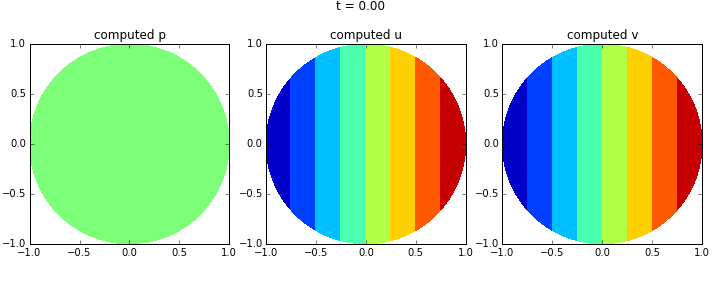
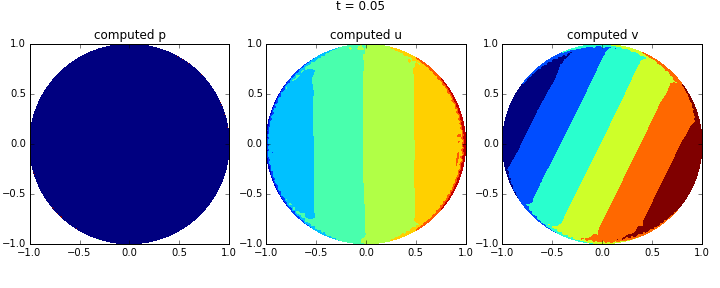
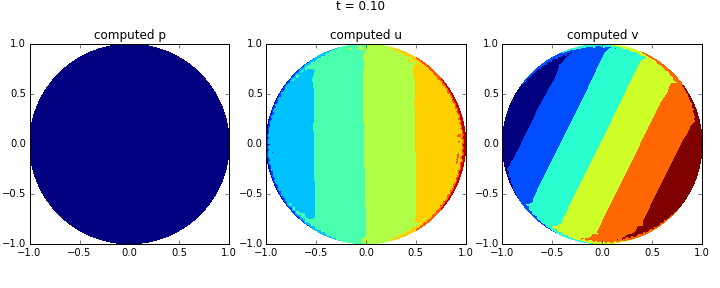
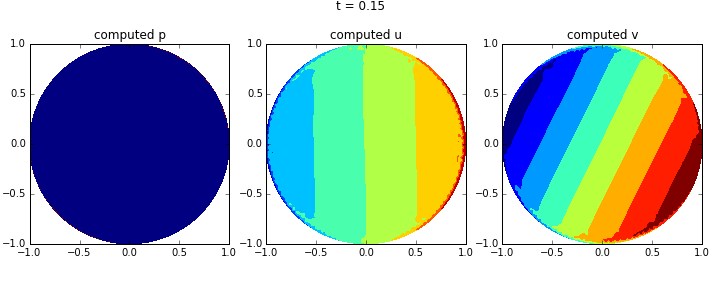
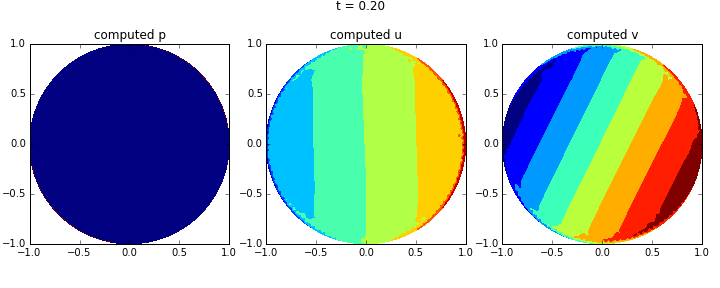
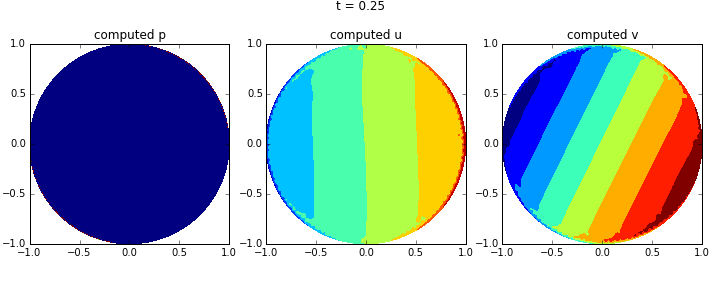
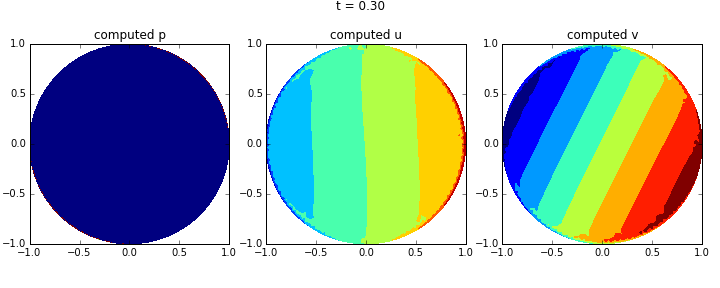
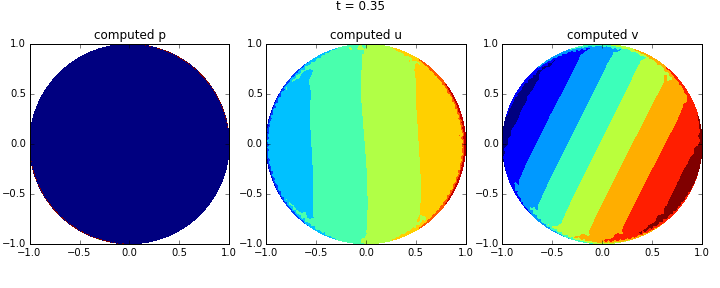
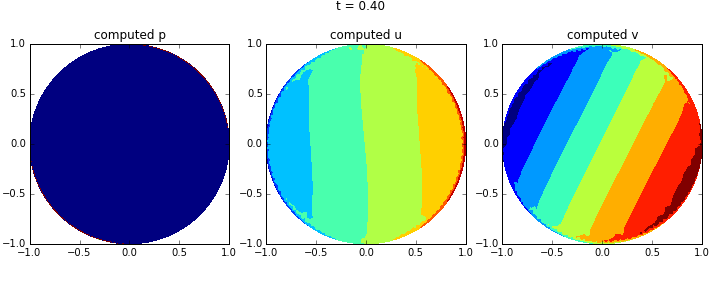
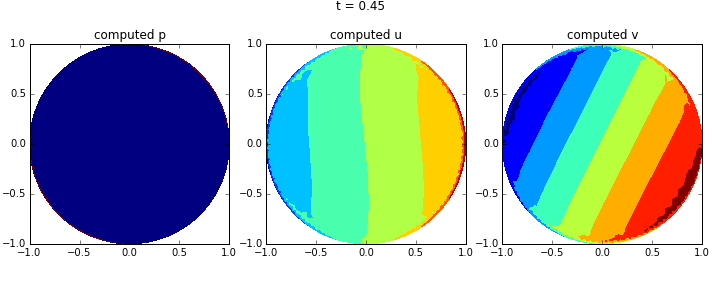
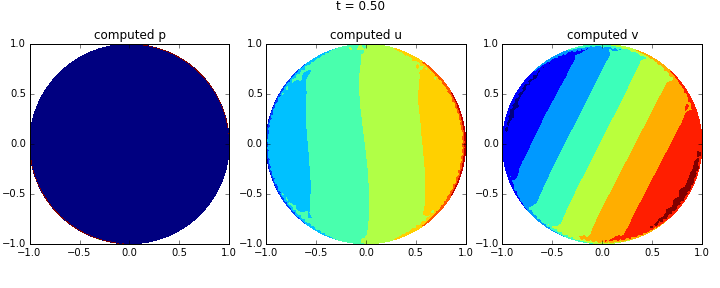
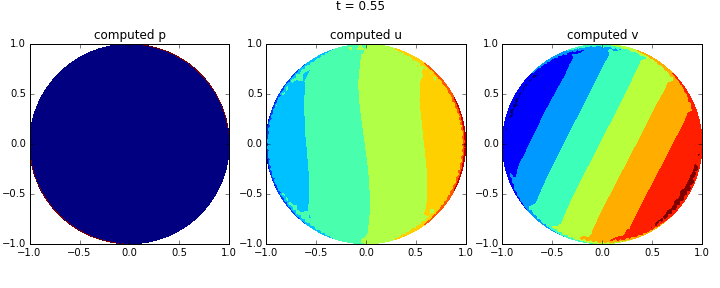
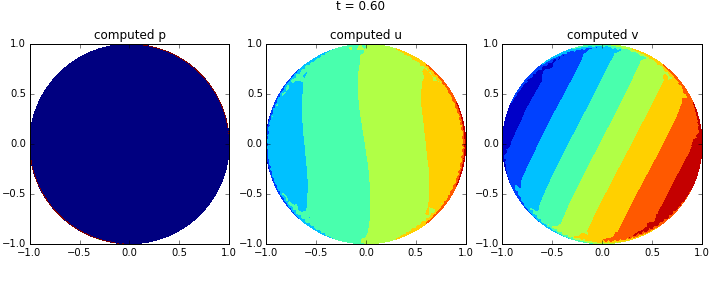
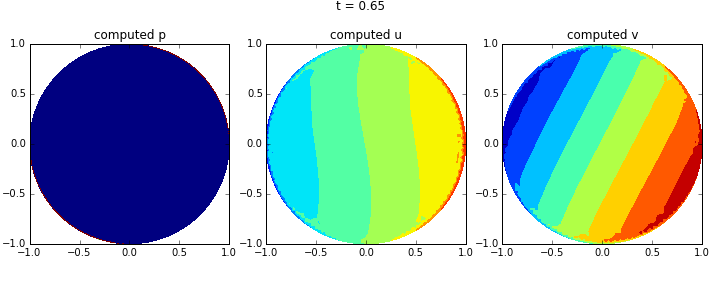
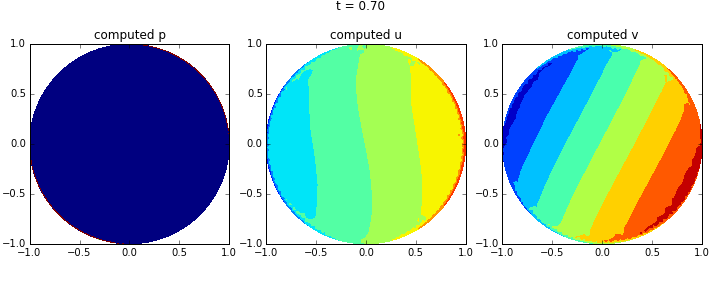
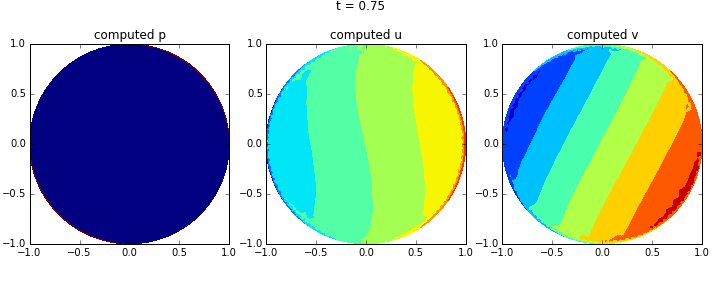
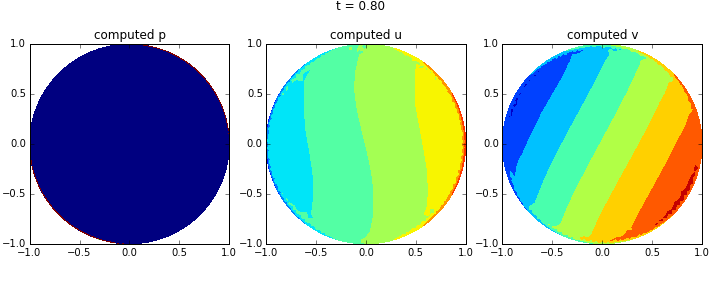
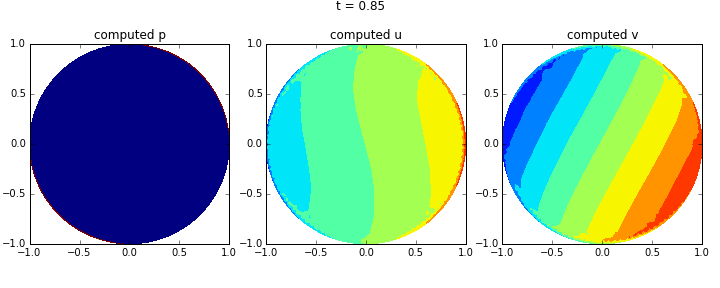
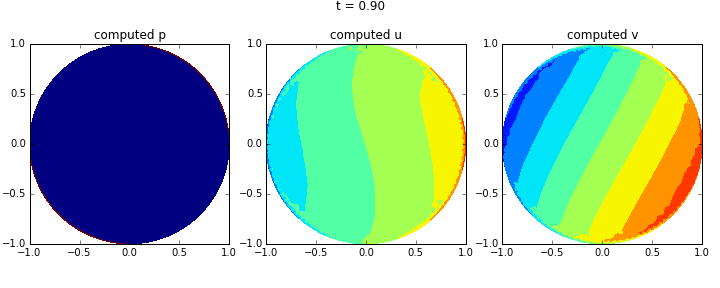
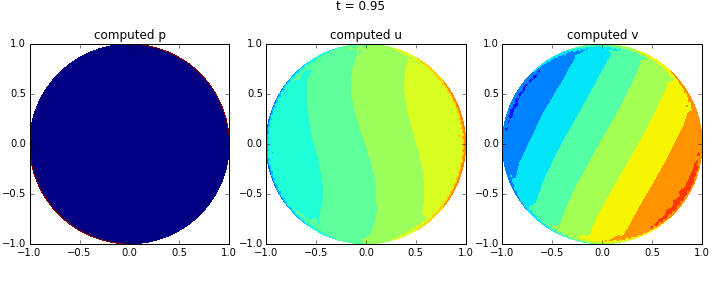
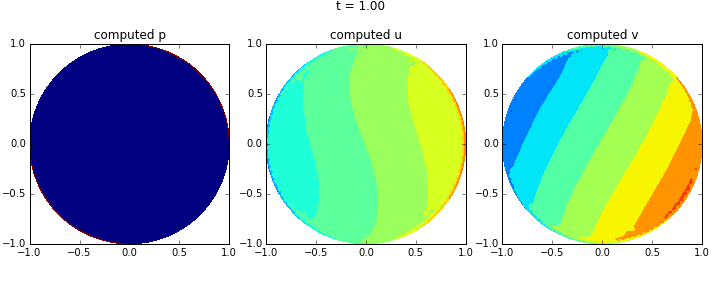
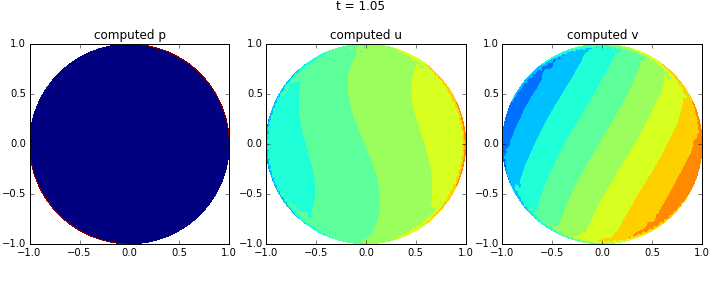
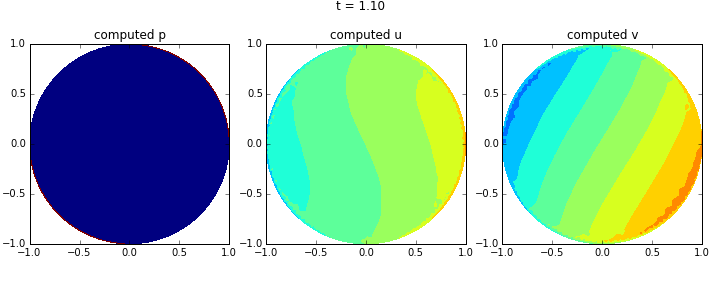
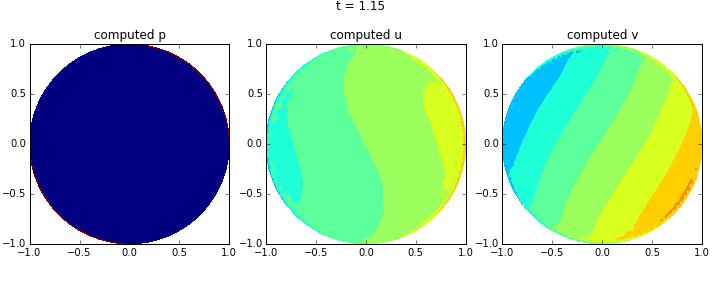
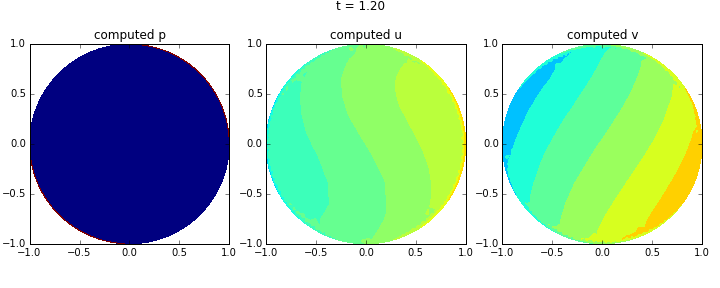
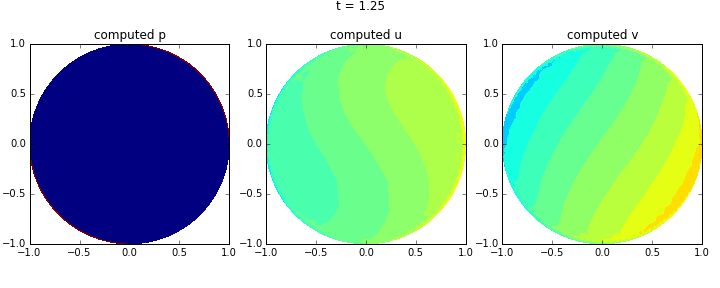
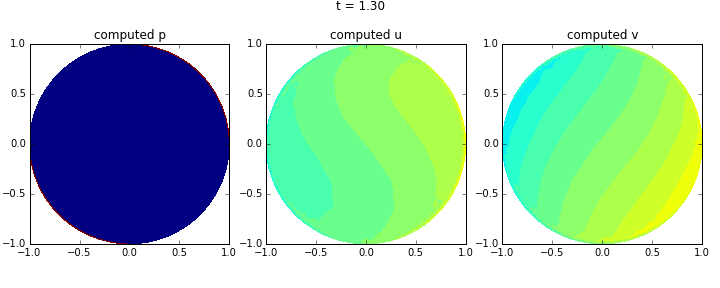
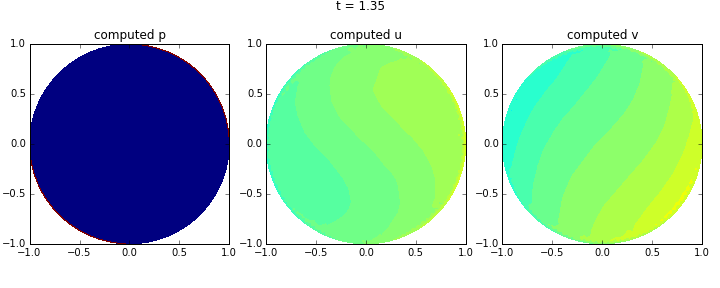
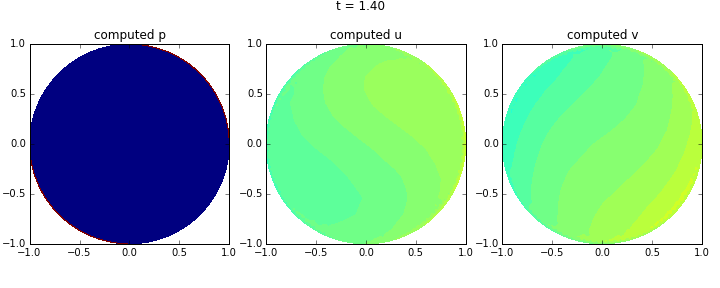
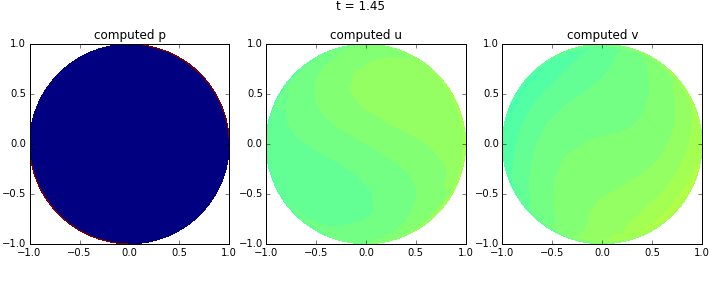
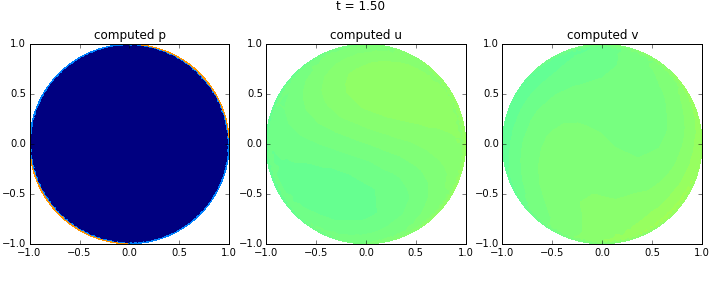
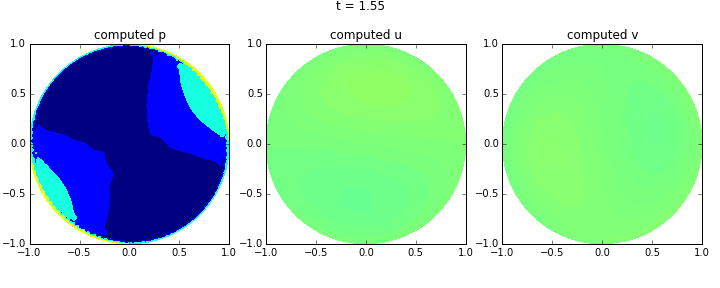
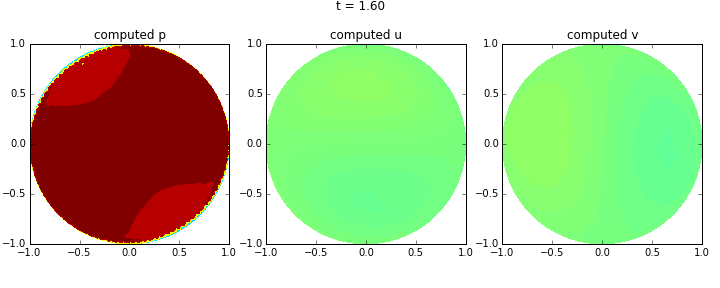
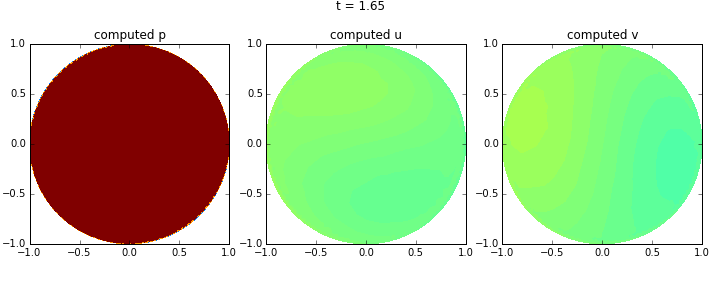
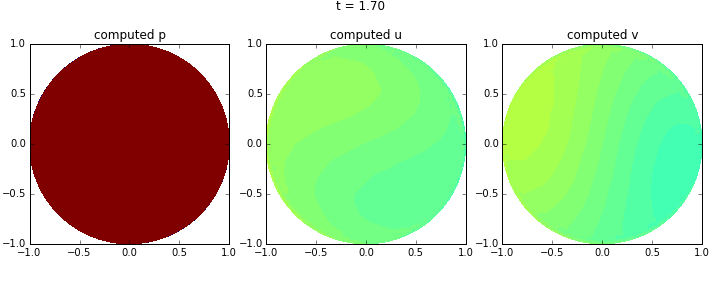
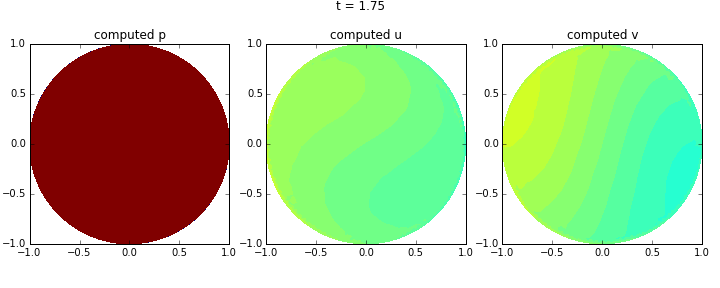
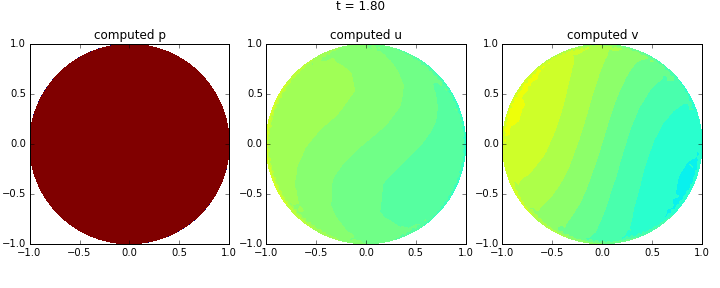
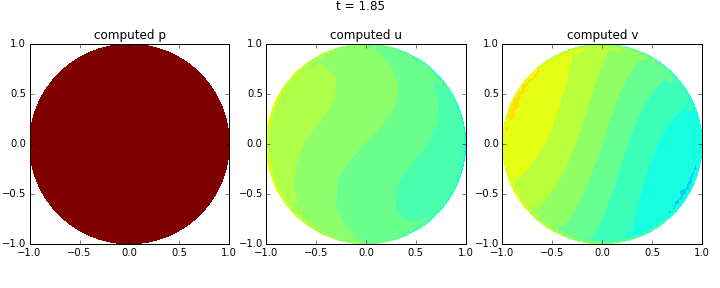
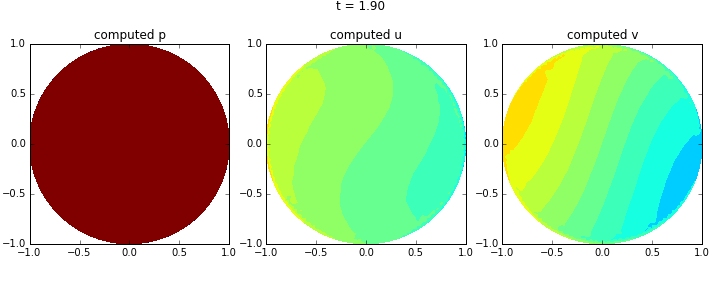
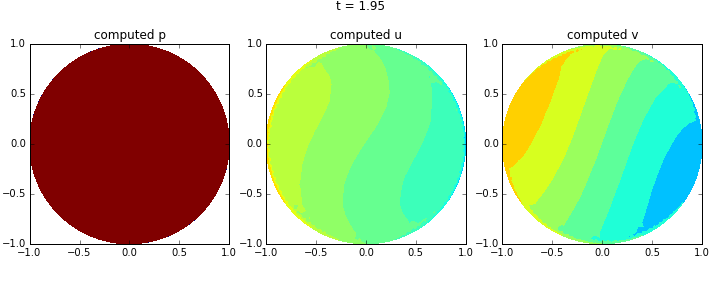
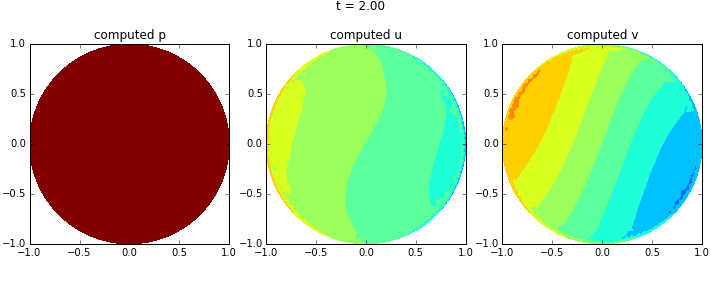
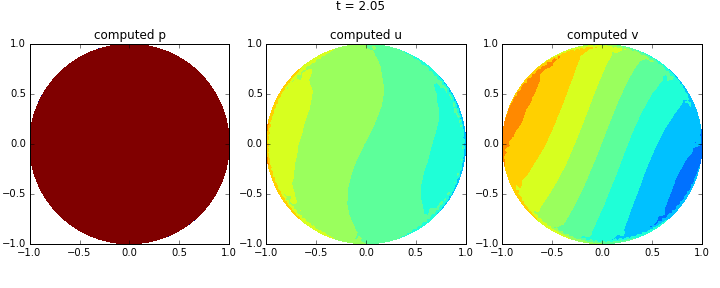
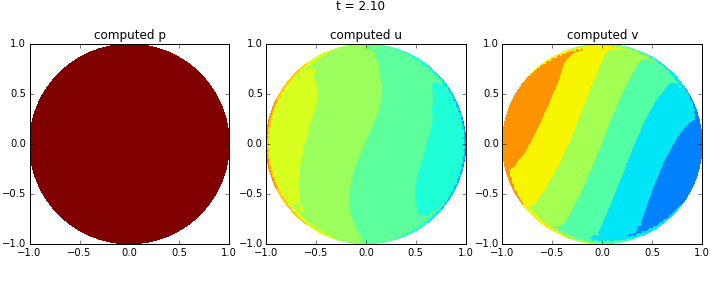
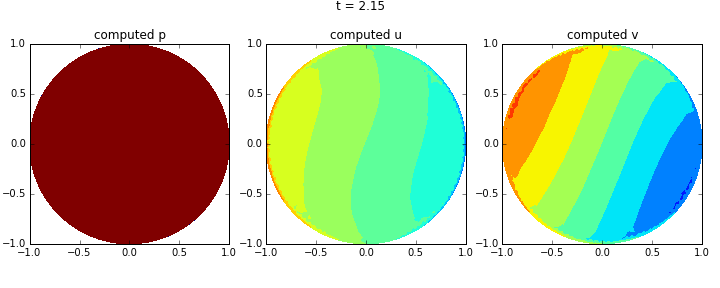
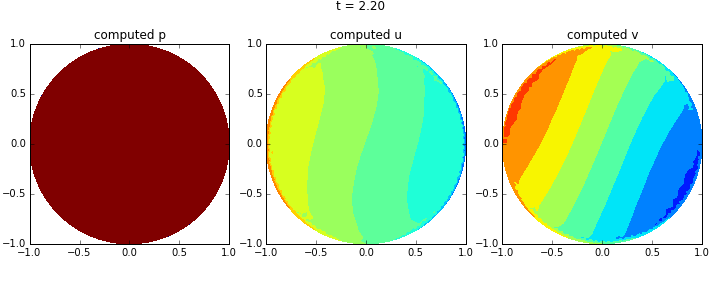
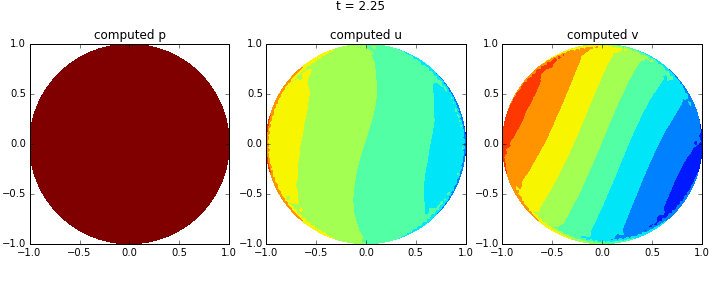
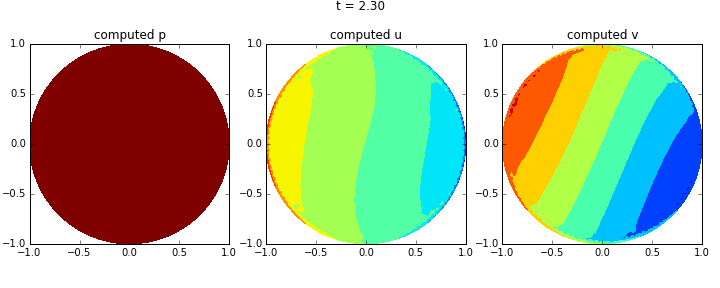
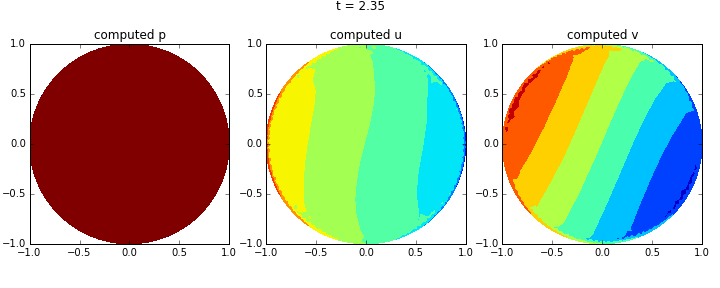
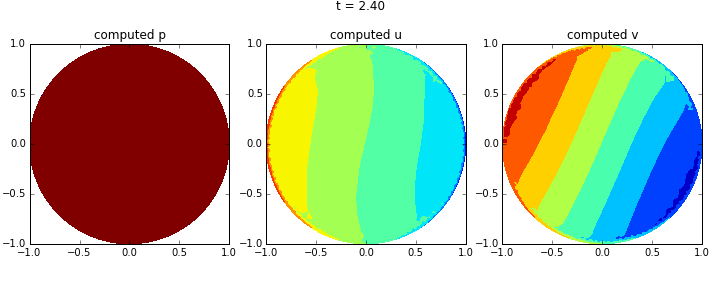
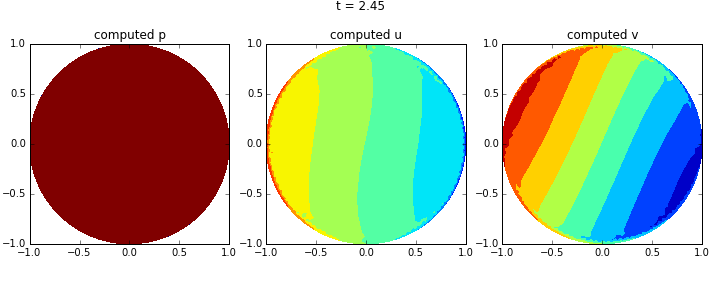
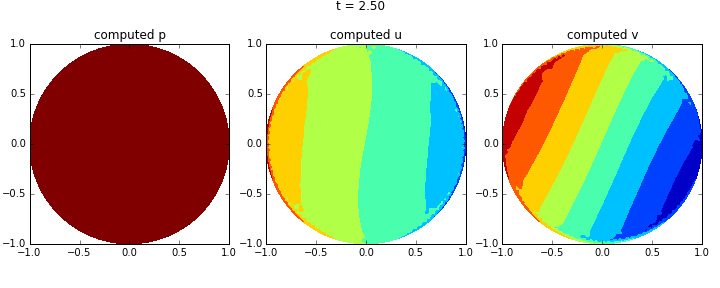
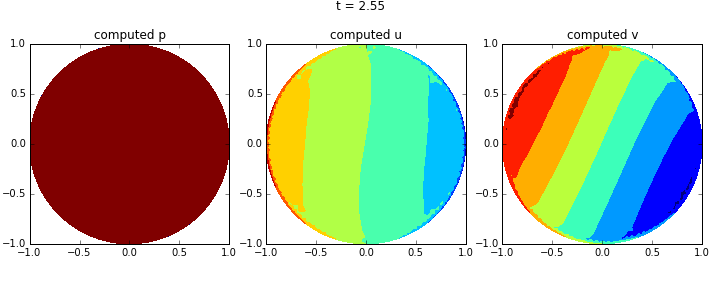
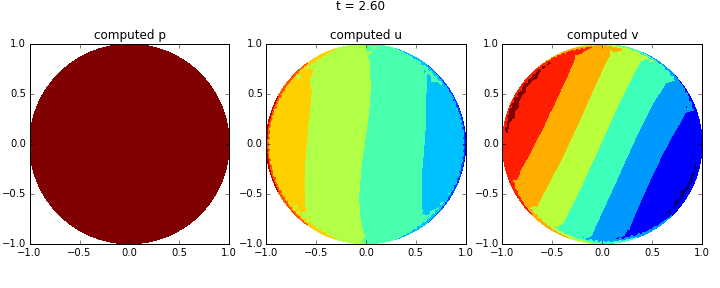
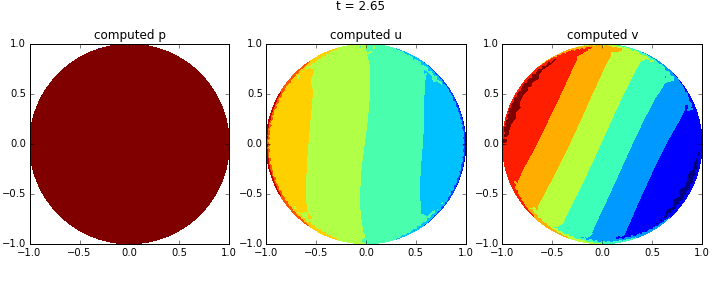
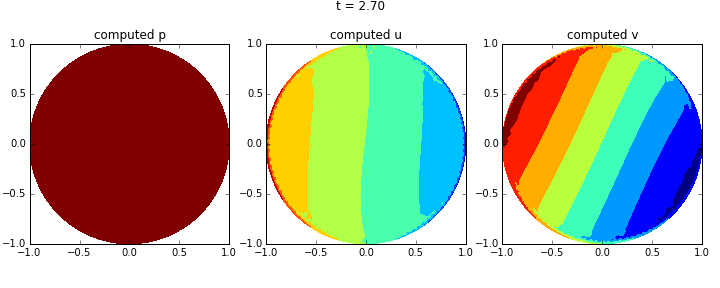
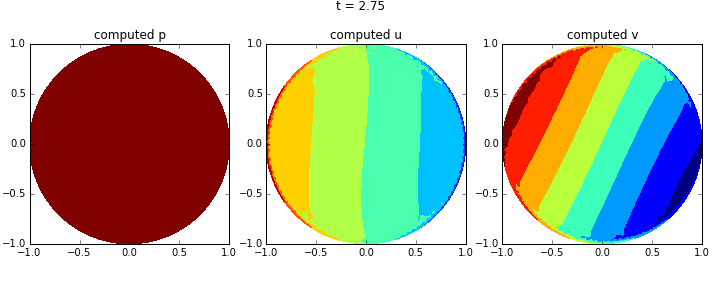
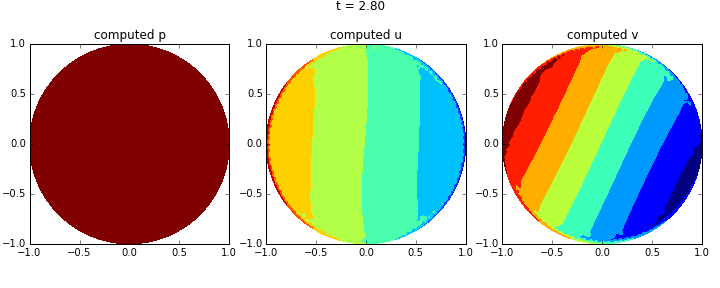
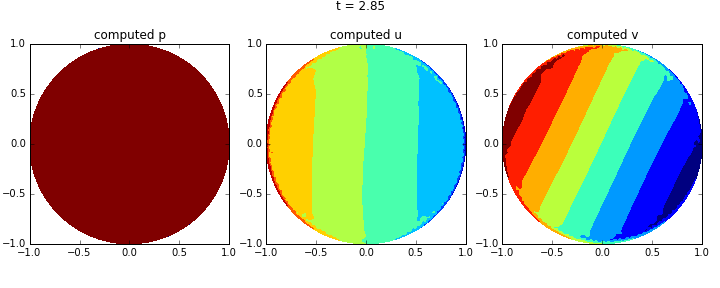
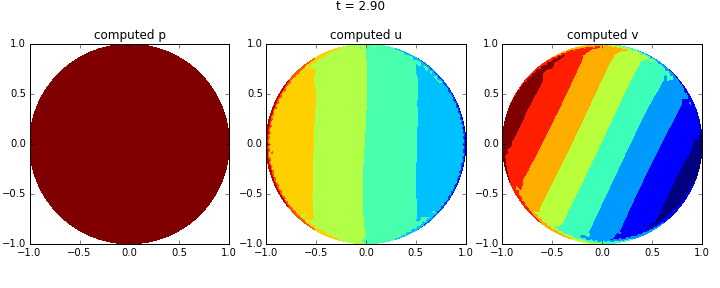
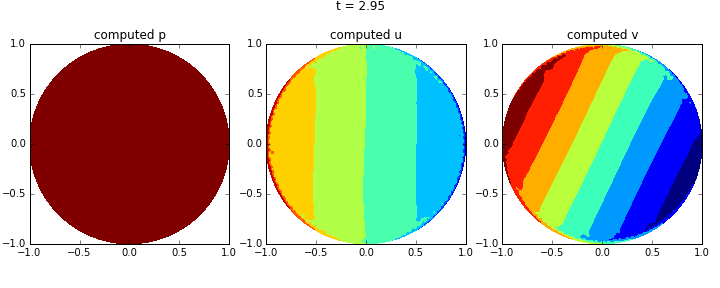
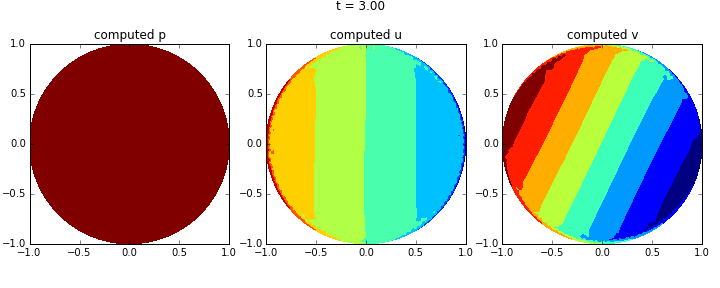
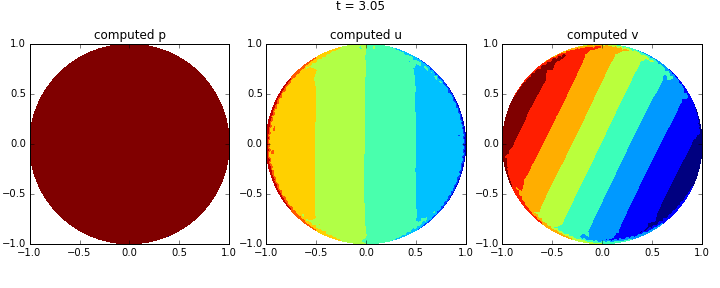
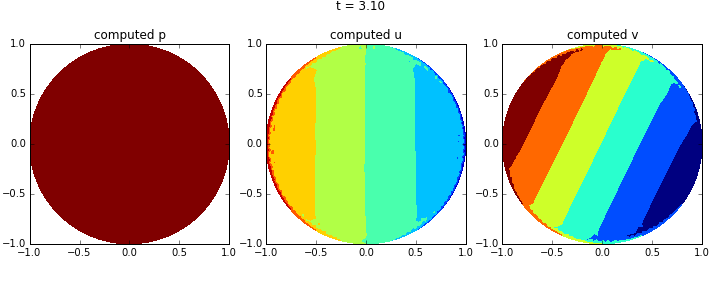
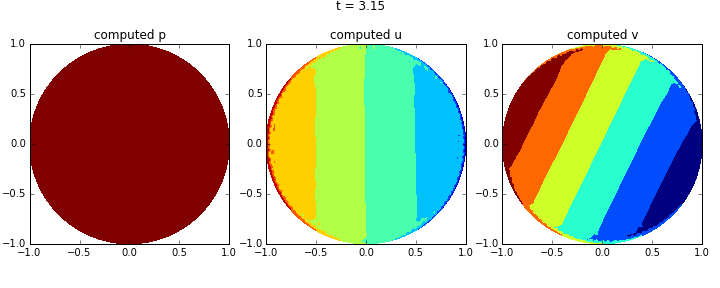
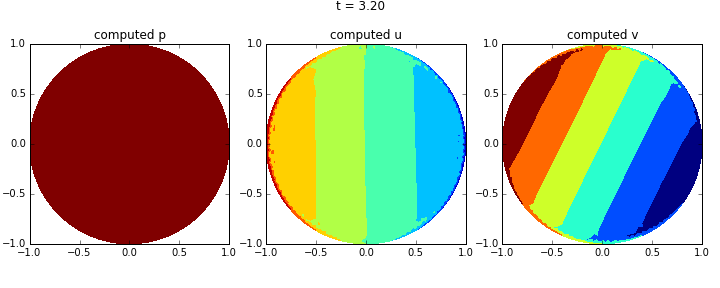
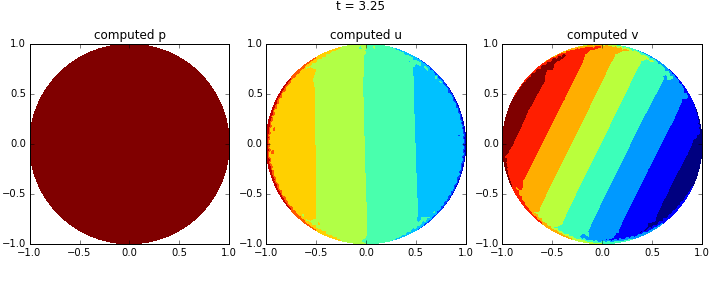
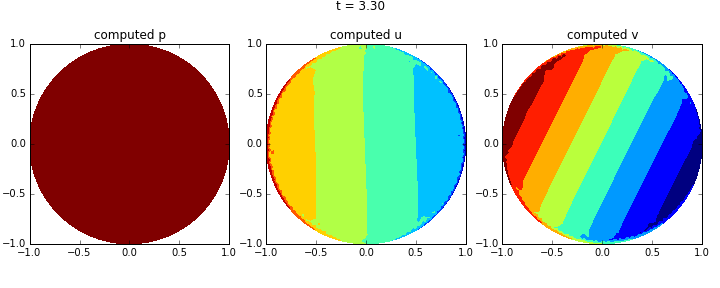
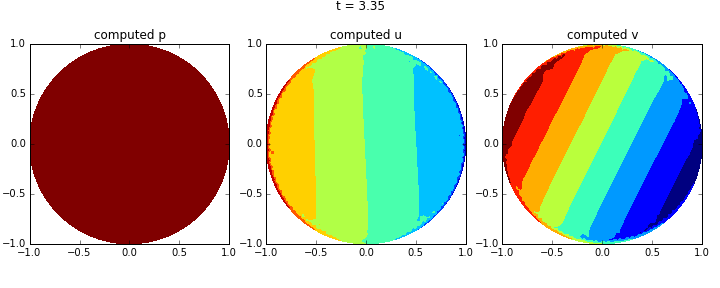
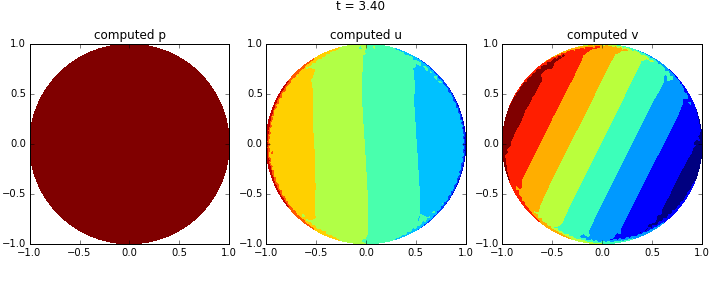
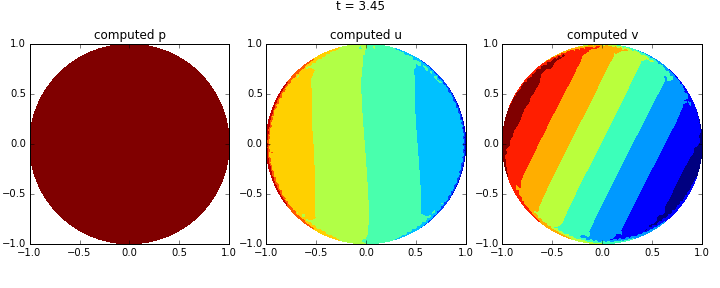
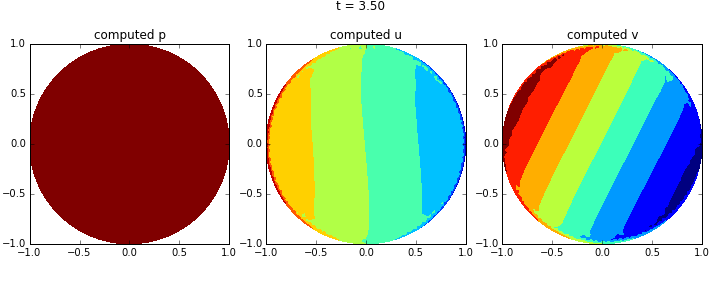
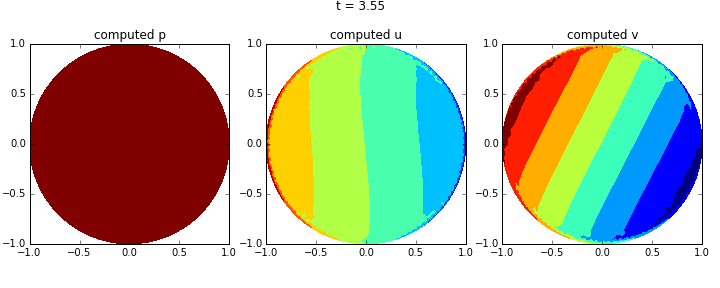
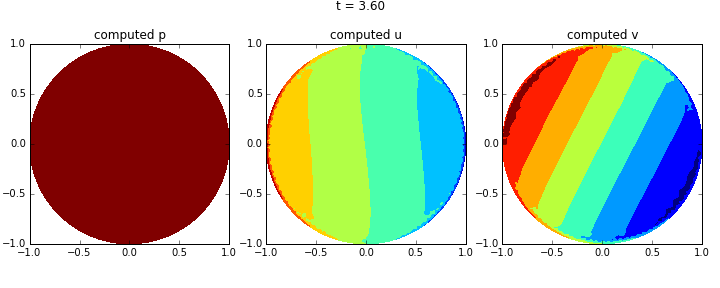
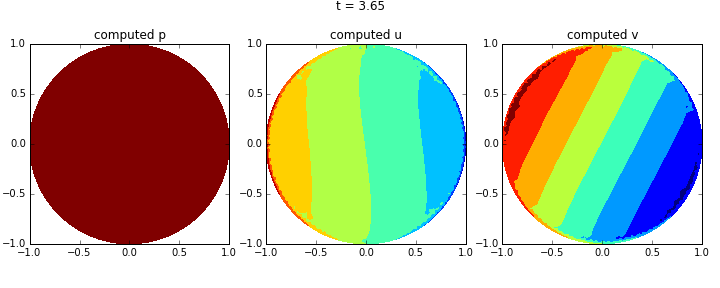
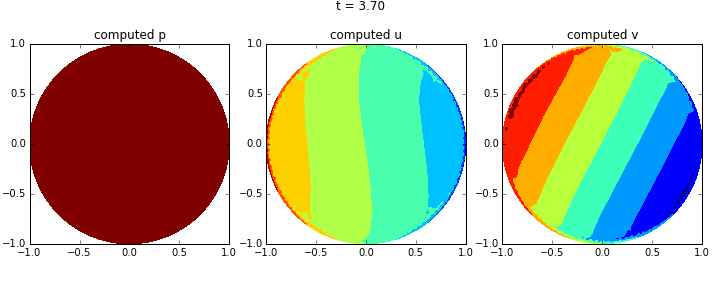
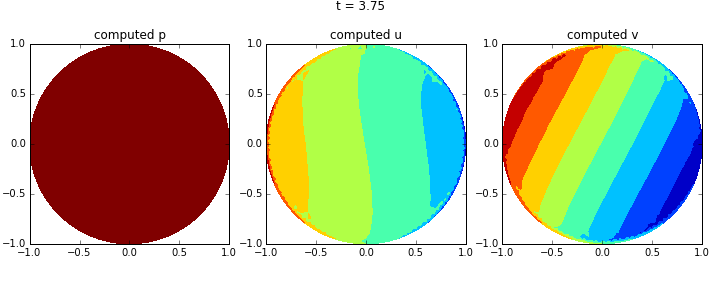
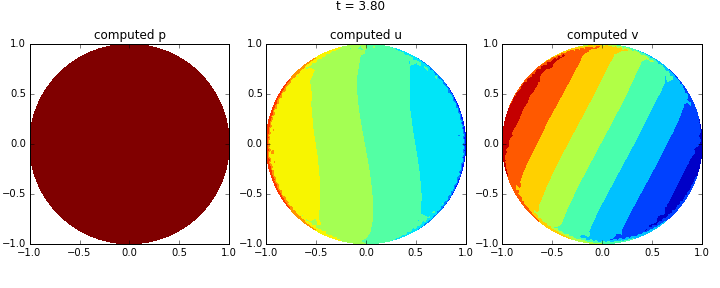
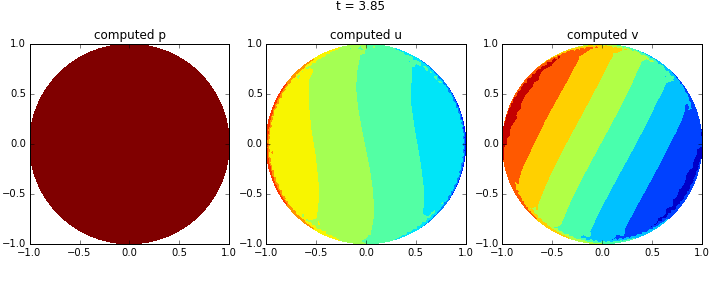
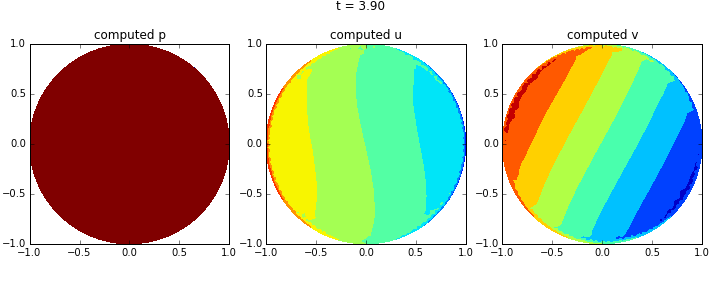
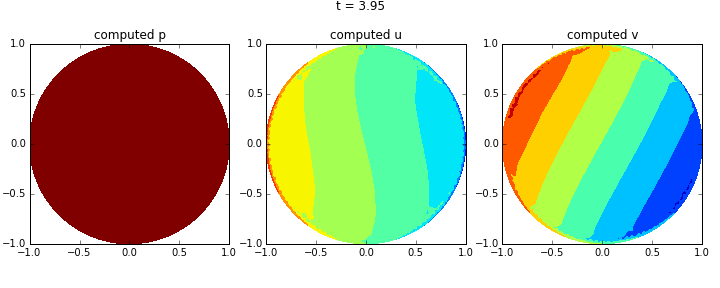
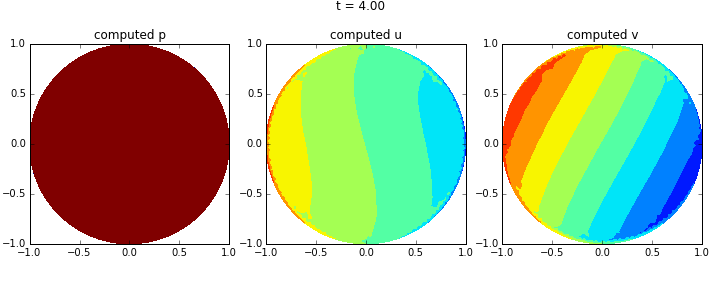
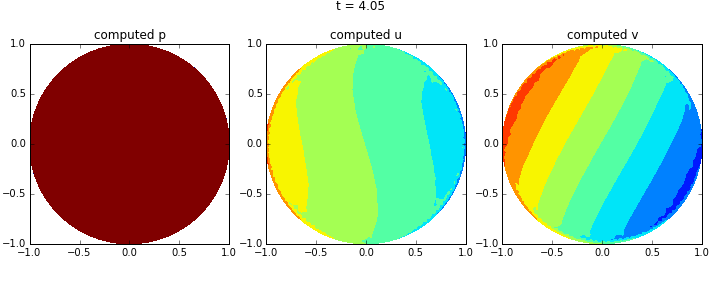
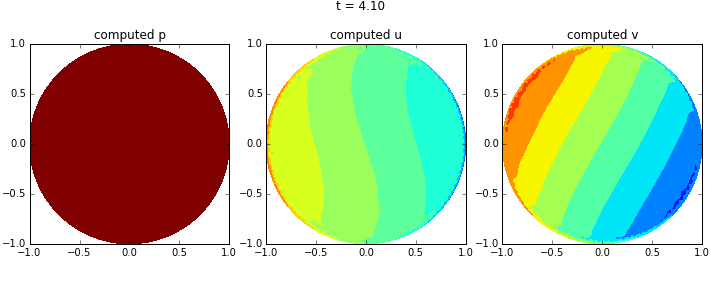
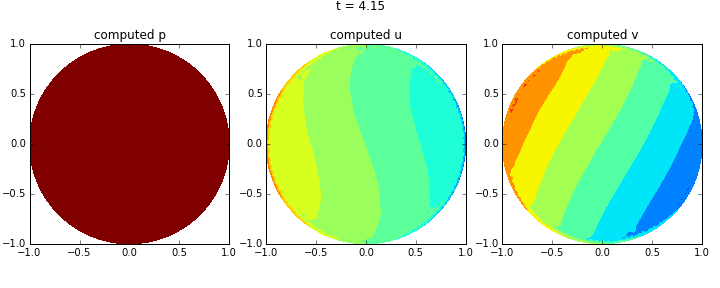
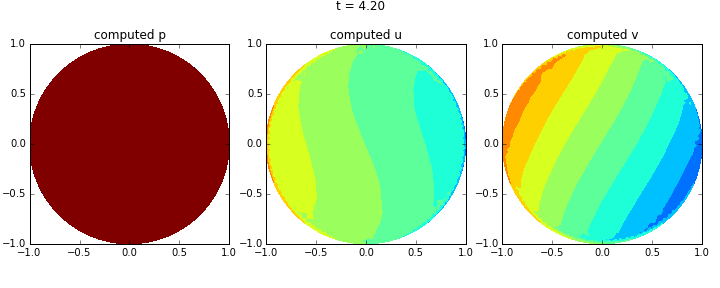
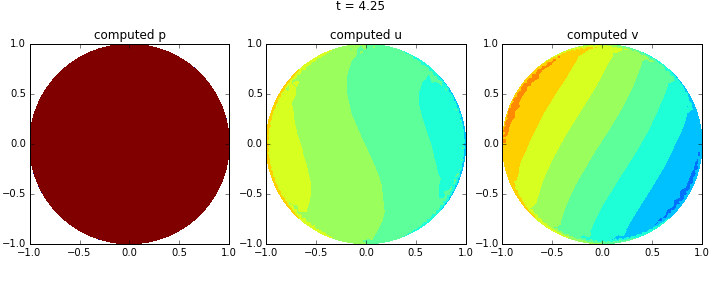
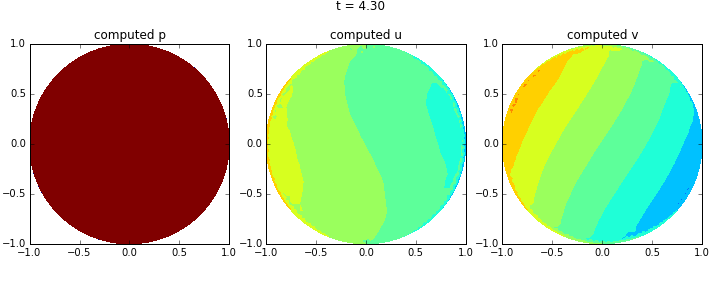
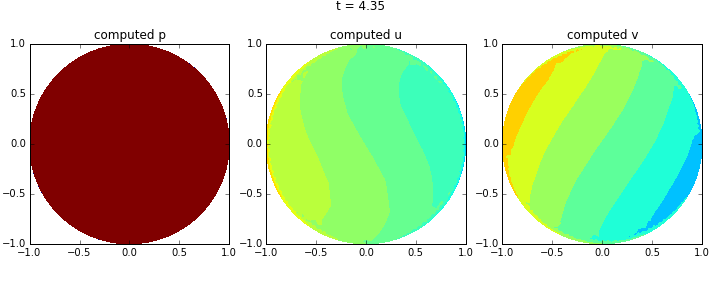
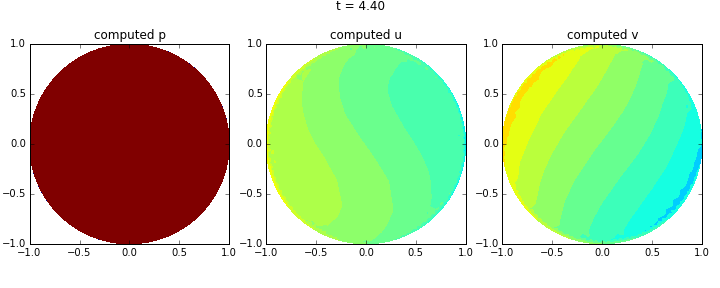
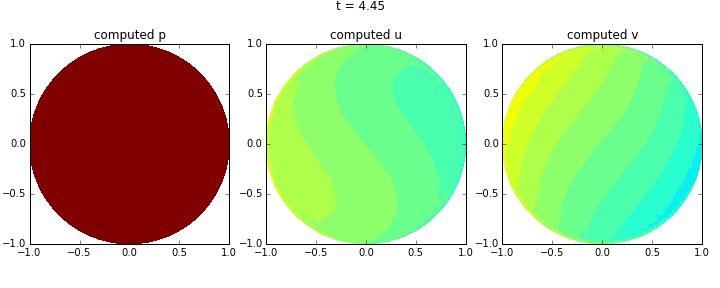
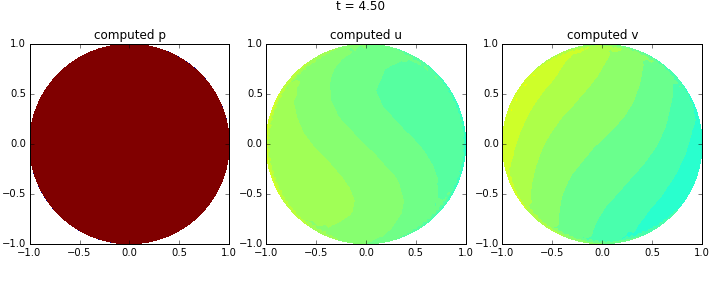
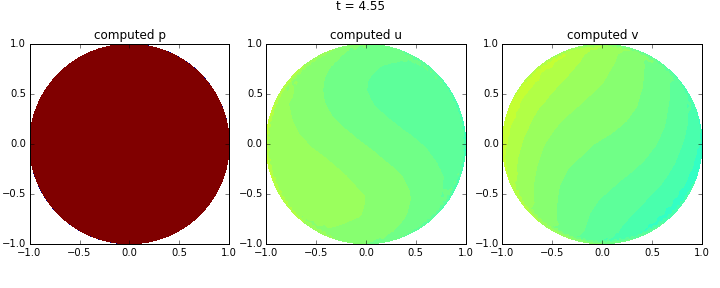
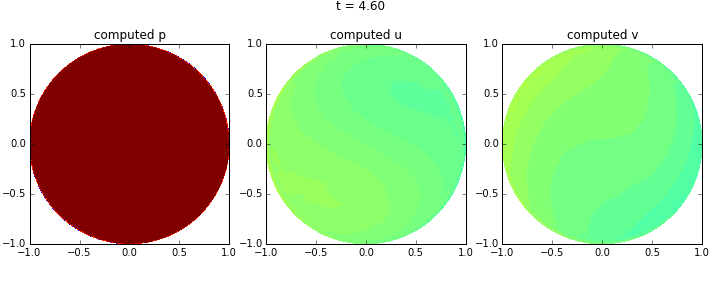
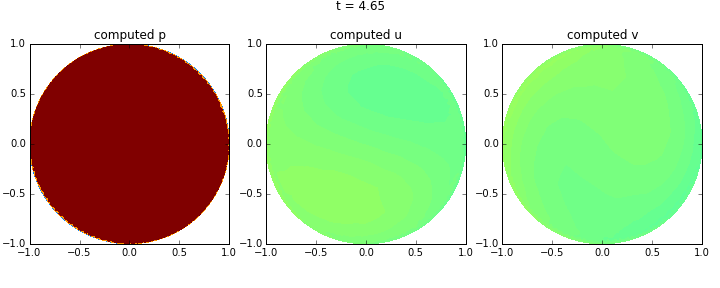
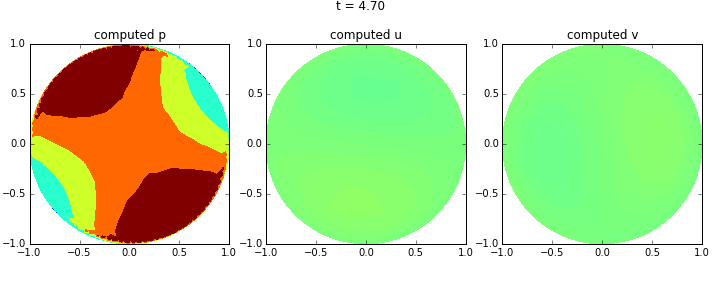
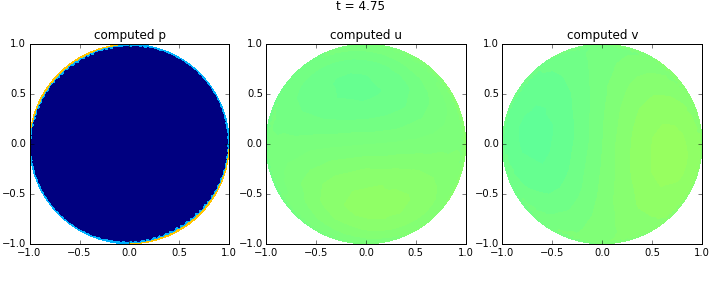
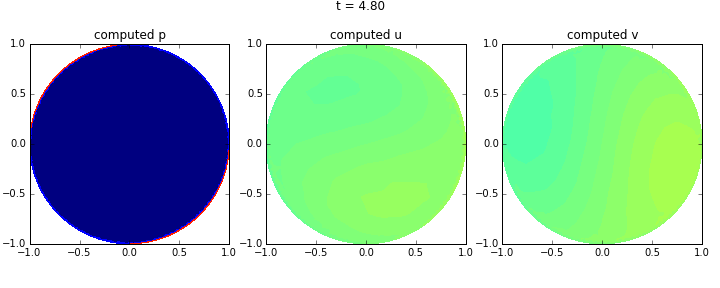
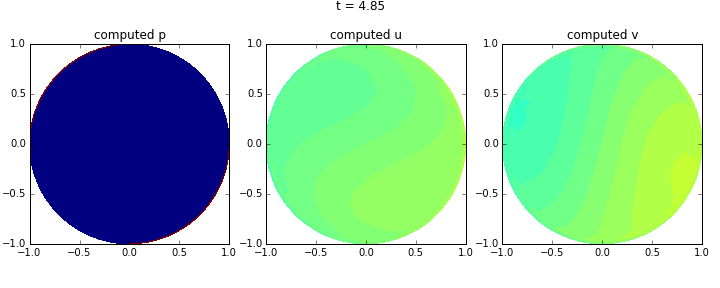
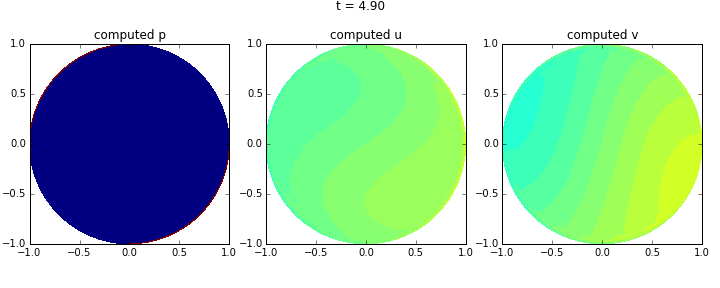
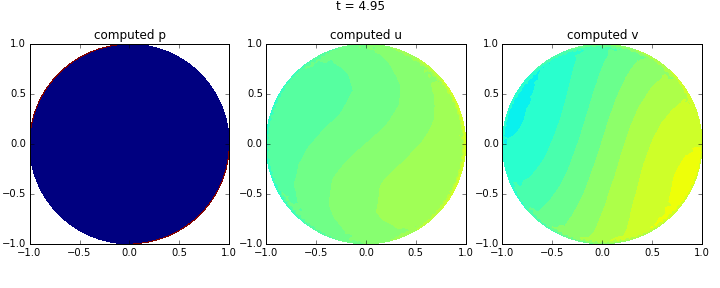
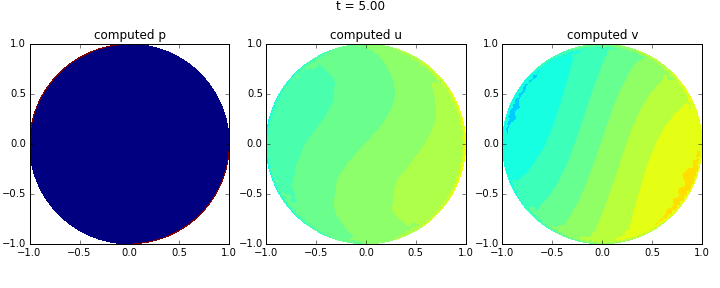

In [15]:
%matplotlib inline

from IPython.core.display import clear_output
from matplotlib import colors

def plot_current_results(in_place=True):
    from matplotlib import  pyplot as plt
    """Makes a blocking call to retrieve remote data and displays the solution mesh
    as a contour plot.
    
    Parameters
    ----------
    in_place : bool
        By default it calls clear_output so that new plots replace old ones.  Set
        to False to allow keeping of all previous outputs.
    """
    model = ns.modelList[1].levelModelList[-1]
    nodes = model.mesh.nodeArray
    triangles = model.mesh.elementNodesArray
    x = nodes[:,0]
    y = nodes[:,1]
    u = model.u[0].dof_last
    fig, ax = plt.subplots()
    ax.tricontourf(x, y, triangles, u)
    if in_place:
        clear_output()
    plt.axis('equal')
    display(fig)
    return fig


def plot_results_step_i(step_i=0,in_place=True):
    from matplotlib import  pyplot as plt
    from tables import openFile
    """Makes a blocking call to retrieve remote data and displays the solution mesh
    as a contour plot.
    
    Parameters
    ----------
    in_place : bool
        By default it calls clear_output so that new plots replace old ones.  Set
        to False to allow keeping of all previous outputs.
    """
    h5=openFile("navier_stokes_2d0.h5","r")
    
    
    triangles = h5.getNode("/elementsSpatial_Domain%i" %step_i)
    xp = h5.getNode("/nodesSpatial_Domain%i" %step_i)[:,0]
    yp = h5.getNode("/nodesSpatial_Domain%i" %step_i)[:,1]
    p = h5.getNode("/p%i" %step_i)[:]
    
    nn = len(p)
    
    xvel = h5.getNode("/nodes_c0p2_Lagrange%i" %step_i)[:nn,0]
    yvel = h5.getNode("/nodes_c0p2_Lagrange%i" %step_i)[:nn,1]
    u = h5.getNode("/u%i" %step_i)[:nn]
    v = h5.getNode("/v%i" %step_i)[:nn]
#     fig, (axp, axu, axv) = plt.subplots(1,3)
    fig = plt.figure(figsize=(10,4)) # w, h in inches
    # fig.add_axes([0.1, 0.1, 0.6, 0.75])
    axp = fig.add_subplot(131)
    axu = fig.add_subplot(132)
    axv = fig.add_subplot(133)
    fig.tight_layout() # spread out the plots so that they don't overlap

    title = fig.suptitle("t=%0.2f"%numerics.tnList[step_i],x=0.5, y=1.00,
             horizontalalignment='center',
             fontsize=12,)
    
    ap = axp.tricontourf(xp, yp, triangles, p, norm=plt.Normalize(vmax=abs(p).max(), vmin=-abs(p).max()))
    au = axu.tricontourf(xvel, yvel, triangles, u, norm=plt.Normalize(vmax=abs(u).max(), vmin=-abs(u).max()))
    av = axv.tricontourf(xvel, yvel, triangles, v, norm=plt.Normalize(vmax=abs(v).max(), vmin=-abs(v).max()))
    if in_place:
        clear_output()
#     plt.axis('equal')
    axp.set_aspect('equal')
    axu.set_aspect('equal')
    axv.set_aspect('equal')
#     display(fig)
    h5.close()
    return fig

# from tables import openFile
# h5=openFile("navier_stokes_2d0.h5","r")
# print h5
# fig = plot_results_step_i(10)




from matplotlib import  pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
from tables import openFile

# setup initial figure spacing and create frames for input
fig = plt.figure(figsize=(10,4)) # w, h in inches
axp = fig.add_subplot(131)
axu = fig.add_subplot(132)
axv = fig.add_subplot(133)
axp.set_aspect('equal')
axu.set_aspect('equal')
axv.set_aspect('equal')
axp.set_title('computed p')
axu.set_title('computed u')
axv.set_title('computed v')

fig.tight_layout() # spread out the plots so that they don't overlap

title = fig.suptitle("",x=0.5, y=1.00,
         horizontalalignment='center',
         fontsize=12,)

def init():
    ap = axp.plot([],[])
    au = axu.plot([],[])
    av = axv.plot([],[])
    return (ap,au,av)


def animate(step_i):
    # time
    t = numerics.tnList[step_i]
    title.set_text("t = %.2f" %t)
    
    h5=openFile("navier_stokes_2d0.h5","r")        
    triangles = h5.getNode("/elementsSpatial_Domain%i" %step_i)
    xp = h5.getNode("/nodesSpatial_Domain%i" %step_i)[:,0]
    yp = h5.getNode("/nodesSpatial_Domain%i" %step_i)[:,1]
    p = h5.getNode("/p%i" %step_i)[:]
    
    nn = len(p)
    xvel = h5.getNode("/nodes_c0p2_Lagrange%i" %step_i)[:nn,0]
    yvel = h5.getNode("/nodes_c0p2_Lagrange%i" %step_i)[:nn,1]
    u = h5.getNode("/u%i" %step_i)[:nn]
    v = h5.getNode("/v%i" %step_i)[:nn]

    ap = axp.tricontourf(xp, yp, triangles, p, norm=plt.Normalize(vmax=1.0, vmin=-1))
    au = axu.tricontourf(xvel, yvel, triangles, u, norm=plt.Normalize(vmax=1., vmin=-1.))
    av = axv.tricontourf(xvel, yvel, triangles, v, norm=plt.Normalize(vmax=1., vmin=-1.))
    
    h5.close()
    plt.show() # force the legends and formatting to show up

    return (axp,axu,axv)

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=np.size(numerics.tnList), interval=30, blit=True) # 30 milliseconds between frames  



Plot an animation of the solution and errors with matplotlib over time $t=0$ to $t=T$. Only works for $C^0 P^1$ right now

In [ ]:
import tables
h5 = tables.openFile("navier_stokes_1d0.h5","r") # change this to use physics.name + "0.h5"

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)



# setup subplots for pressure and velocity
fig = plt.figure(figsize=(10,5)) # w, h in inches
# fig.add_axes([0.1, 0.1, 0.6, 0.75])
axep = fig.add_subplot(221)
axp = fig.add_subplot(222)
axev = fig.add_subplot(223)
axv = fig.add_subplot(224)

fig.tight_layout() # spread out the plots so that they don't overlap

title = fig.suptitle("",x=0.5, y=1.00,
         horizontalalignment='center',
         fontsize=12,)

# pressure lines and axes
axp.set_xlim((0, physics.L[0]))
axp.set_ylim((0,3)) # un hard code this
line_p, = axp.plot([], [],'rx-', lw=2, label='computed pressure')
line_ptrue, = axp.plot([], [],'b-', lw=2, label='exact pressure')
axp.set_xlabel('x')
# axp.set_ylabel('pressure')
# axp_legend = axp.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., shadow=True)
axp_legend = axp.legend(loc='upper right', borderaxespad=0., shadow=True)
axp_frame = axp_legend.get_frame()
axp_frame.set_facecolor('0.90')

# Set the fontsize
for label in axp_legend.get_texts():
    label.set_fontsize('large')
for label in axp_legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

# pressure error plots
axep.set_xlim((0, physics.L[0]))
axep.set_ylim((0,0.1)) # un hard code this
line_ep, = axep.plot([], [],'b-', lw=2,label='$|p(t)-\widehat{p}(t)|$')
axep.set_xlabel('x')
# axep.set_ylabel('$|p-\widehat{p}|$')
axep_legend = axep.legend(loc='upper right', borderaxespad=0., shadow=True)
axep_frame = axep_legend.get_frame()
axep_frame.set_facecolor('0.90')

# Set the fontsize
for label in axep_legend.get_texts():
    label.set_fontsize('large')
for label in axep_legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    
    
# velocity lines and axes
axv.set_xlim((0, physics.L[0]))
axv.set_ylim((-0.6, 1.0))
line_v, = axv.plot([], [],'rx-', lw=2, label='computed velocity')
line_vtrue, = axv.plot([], [],'b-', lw=2,label='exact velocity')
axv.set_xlabel('x')
# axv.set_ylabel('velocity')
# axv_legend = axv.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., shadow=True)
axv_legend = axv.legend(loc='upper right', borderaxespad=0., shadow=True)
axv_frame = axv_legend.get_frame()
axv_frame.set_facecolor('0.90')

# velocity error plots
axev.set_xlim((0, physics.L[0]))
axev.set_ylim((0,1.5e-7)) # un hard code this
line_ev, = axev.plot([], [],'b-', lw=2, label='$|v(t) - \widehat{v}(t)|$')
axev.set_xlabel('x')
# axev.set_ylabel('$|v-\widehat{v}|$')
axev_legend = axev.legend(loc='upper right', borderaxespad=0., shadow=True)
axev_frame = axev_legend.get_frame()
axev_frame.set_facecolor('0.90')

def extractP2velocity(x,v):
    xm = np.array(0.5*(x[:-1]+x[1:]))
    xq=[];
    vq=[];
    for i in range(numerics.nn-1):
        xq.append(x[i])
        vq.append(v[i])
        xq.append(xm[i])
        vq.append(v[numerics.nn+i])
    xq.append(x[-1])
    vq.append(v[numerics.nn-1])
#     print x[-1], v[numerics.nn-1]
    return xq, np.array(vq)


def init():
    line_p.set_data([], [])
    line_ptrue.set_data([],[])
    line_ep.set_data([],[])
    line_v.set_data([], [])
    line_vtrue.set_data([],[])
    line_ev.set_data([],[])
    return (line_p, line_ptrue, line_ep, line_v, line_vtrue, line_ev)


def animate(i):
    # time
    t = numerics.tnList[i]
    title.set_text("t = %.2f" %t)
    
    # pressure
    xp = h5.getNode("/nodesSpatial_Domain%i" %i)[:,0]
    p_comp = h5.getNode("/p%i" %i)[:]
    p_true = 0.0*p_comp
    for j,val in enumerate(xp):
        p_true[j] = ptrue(np.array([val]),t)
        
    line_p.set_data(xp, p_comp)    
    line_ptrue.set_data(xp, p_true)
    line_ep.set_data(xp, abs(p_comp-p_true))

    # velocity
    xv, v_comp = extractP2velocity(xp, h5.getNode("/v%i" %i)[:])
    v_true = 0.0*v_comp
    for j,val in enumerate(xv):
        v_true[j] = vtrue(np.array([val]),t)
        
    line_v.set_data(xv, v_comp)    
    line_vtrue.set_data(xv, v_true)
    line_ev.set_data(xv, abs(v_comp-v_true))

    plt.show() # force the legends and formatting to show up

    return (line_p, line_ptrue, line_ep, line_v, line_vtrue, line_ev)


animation.FuncAnimation(fig, animate, init_func=init,
                        frames=np.size(numerics.tnList), interval=30, blit=True) # 30 milliseconds between frames  


In [ ]:
# close the table file after extracting all the solutions for the movie above
h5.close()

Compare computed solution to the exact solution, evaluated at the degrees of freedom for the last time step, $T$. Again, only works for C0P1 elements.

In [ ]:
%matplotlib inline

# extract computed solutions and mesh at time T

#arrays for using matplotlib's unstructured plotting interface
x = ns.modelList[0].levelModelList[-1].mesh.nodeArray[:,0]
#y = ns.modelList[0].levelModelList[-1].mesh.nodeArray[:,1]
#triangles = ns.modelList[0].levelModelList[-1].mesh.elementNodesArray

# grab the last time step solution and save the components as p and v
p = ns.modelList[0].levelModelList[-1].u[0].dof
v = ns.modelList[0].levelModelList[-1].u[1].dof


# extract exact solutions at time T
p_true = ptrue(ns.modelList[0].levelModelList[-1].mesh.nodeArray, physics.T)
v_true = vtrue(ns.modelList[0].levelModelList[-1].mesh.nodeArray, physics.T)
r_true = rofxtrue(ns.modelList[0].levelModelList[-1].mesh.nodeArray, physics.T)

# plot computed solutions
import matplotlib.pyplot as plt

# use matplotlib.rc to change titles and labels to process latex code and change fonts
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Plotting Pressure

# Set plotting features including legend and formatting colors and shading
fig, (ax1,ax2) = plt.subplots(2,1)
fig.tight_layout() # spread out the plots so that they don't overlap
ax1.plot(x,p,'rx-',label='$\widehat{p}(%s)$' %physics.T)
ax1.plot(x,p_true,'b-',label='$p(%s)$' %physics.T)
ax1.set_xlabel('x')
ax1.set_ylabel('pressure')
ax1_legend = ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., shadow=True)
ax1_frame = ax1_legend.get_frame()
ax1_frame.set_facecolor('0.90')
# Set the fontsize
for label in ax1_legend.get_texts():
    label.set_fontsize('large')
for label in ax1_legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

    
# plotting Velocity

useTH=True
if not useTH:
    ax2.plot(x, v[:numerics.nn],'r+-',label='$\widehat{v}(%s)$' %physics.T)
else:
    # This is hard coded for plotting P^2 elements for velocity
    xm = np.array(0.5*(x[:-1]+x[1:]))
    xq=[];
    vq=[];
    pq=[];
    for i in range(numerics.nn-1):
        xq.append(x[i])
        vq.append(v[i])
        #uq.append(u[i])
        xq.append(xm[i])
        vq.append(v[numerics.nn+i])
        #uq.append(u[numerics.nn+i])
    xq.append(x[-1])
    vq.append(v[-1])
    #uq.append(u[-1])
    #ax2.plot(xq,uq)
    ax2.plot(xq,vq,'r+-',label='$\widehat{v}(%s)$' %physics.T)

# add formatting and legend to ax2 plot on the outside right of plot
ax2.set_xlabel('x')
ax2.set_ylabel('velocity')
ax2.plot(x, v_true, 'b-',label='$v(%s)$' %physics.T)
ax2_legend = ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., shadow=True)
ax2_frame = ax2_legend.get_frame()
ax2_frame.set_facecolor('0.90')
# Set the fontsize
for label in ax2_legend.get_texts():
    label.set_fontsize('large')
for label in ax2_legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.show()

Compute the discrete maximum norm and $\ell_2$ norms for velocity and pressure.

In [ ]:

# pressure error and plotting
print 'Pressure P^1 elements:  Number of Nodes: %s' %(x.shape[0])
fig, (ax1,ax2) = plt.subplots(2,1)
fig.tight_layout() # spread out the plots so that they don't overlap
err_p = p - p_true
print "Maximal error of pressure(T) on gridpoints           = %s" % max(abs(err_p))
ax1.plot(x,abs(err_p),label='$|p-\hat{p}|(t=%s)$' %physics.T)
ax1.set_xlabel('x')
ax1.set_ylabel('$e_p$')
ax1_legend = ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., shadow=True)
ax1_frame = ax1_legend.get_frame()
ax1_frame.set_facecolor('0.90')
# Set the fontsize
for label in ax1_legend.get_texts():
    label.set_fontsize('large')
for label in ax1_legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    
# finish calculating the ell2 norm for pressure
err_p *= err_p
err_p *= physics.L[0]*physics.L[1]/(numerics.nn)
L2approx_p = np.sqrt(err_p.sum())
print "Trapezoidal rule approx to \ell_2 error of pressure(T) = %s\n" % L2approx_p


# Velocity error and plotting
print 'Velocity P^2 elements:  Number of Nodes: %s,  Midpoints: %s' %(x.shape[0],xm.shape[0])

# note that the x values for $v_hat_at_T \in\mathbb{P}^2(\mathcal{T})$  are given nodes then midpoints [x,xm]
xvals = np.concatenate((x,xm))
v_true = 0.0*v
for i,val in enumerate(xvals):
    v_true[i] = vtrue(np.array([val]),physics.T)
err_v = v - v_true
# now v_hat_at_T and vtrue and err_v have the same order: nodes then midpoints for P^2 elements

# sort the x values and reorder for plotting
ind = np.argsort(xvals)
xvals_sort = xvals[ind]
err_v_sort = err_v[ind]

print "Maximal error of velocity on gridpoints                        is %s" % max(abs(err_v))
ax2.plot(xvals_sort,err_v_sort,label='$|\hat{v}-v|(t=%s)$' %physics.T)
ax2.set_xlabel('x')
ax2.set_ylabel('$e_v$')
ax2_legend = ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., shadow=True)
ax2_frame = ax2_legend.get_frame()
ax2_frame.set_facecolor('0.90')
# Set the fontsize
for label in ax2_legend.get_texts():
    label.set_fontsize('large')
for label in ax2_legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width

err_v *= err_v
err_v *= physics.L[0]*physics.L[1]/(numerics.nn)
L2approx_v = np.sqrt(err_v.sum())
print "Trapezoidal rule approx to \ell_2 error of velocity for nn=%s is %s" % (numerics.nn, L2approx_v)

# adjust the plots to be up to date
plt.show()